<a href="https://colab.research.google.com/github/MinaMelek/Arabic-socialMedia-evaluation/blob/main/pipeline_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSA Facebook pages Sentiment analysis



**Notes on the data:**


*   There are a 8911 dublicated samples in the text corpuses, so they were deleted.
[cell link](https://colab.research.google.com/drive/1-Mmv_xIzgg1PhDbu4lGPVrMOfI8zZUpw?authuser=1#scrollTo=AE1DyLU24c3_&line=2&uniqifier=1)
*   The arabic stemming library is leaky, a hard coded stemming was developed for Egyptian dialect, so a modification for KSA might be required.
*   More data investigation is required, to determine the special cases of KSA accent.
*   Topic investigation is required before advancing more in the code.
*   Number of files that contain KSA data is 19, the number of samples per file are in [this cell](https://colab.research.google.com/drive/1-Mmv_xIzgg1PhDbu4lGPVrMOfI8zZUpw?authuser=1#scrollTo=MPn66Q0Y4skv&line=1&uniqifier=1).



**Samples from the data**


*   **Positive feedback** -> 'د. الهام من افضل الاطباء علما و خلقا'
*   **Negative feedback** -> والله الواحد يخاف يخسر فلوس ومايستفيد لاني جربت الأجهزه ومااستفدت  خسرت مبالغ   واصبت بالاحباط خساره وقت ومبالغ   وآخر  شي احباط اذا تضمنو اكيد جهاز انكيرف يساعد على نحت احنا مجموعه  نجي ونجرب شي اكيد'
*   **Price inquiry**     -> 'كم زراعة الاسنان كامل لوسحتو رجعولي خبر'
*   **Place inquiry**     -> 'أين المكان بالضبط'
*   **Date-Time inquiry**     -> 'لو سمحت عاوز احجز واخد ميعاد في العيادة'
*   **service inquiry**     -> 'لو سمحتم هل يوجد عروض للكشف المبكر والماموجرام وكم سعره'
*   **Mention** -> 'احمد اسماعيل'
*   **Consultation** -> 'انا القولون تاعبي جدا وكشفت قلي عندك مكروب'
*   **Medical Advice** -> 'الشفاء من أمراض البرد والانفلونزا ويقوي المناعة في الجسم ونضارة البشرة وحماية الجلد'
*   **Career** -> 'السلام عليكم هل يوجد وظيفيه شاغره لاخصائي اسنان و زوجته اخصائيه طب امراض سريريه'

*   **Links** -> 'https://www.facebook.com/Dukkany-%D8%AF%D9%83%D8%A7%D9%86%D9%8A-189932068475721/'
*   **Blesses** -> 'اللهم  أشفيني وأرزقني وأصرف عني والمؤمنين أجمعين شر الأمراض يارب العالمين وصل الله علي الحبيب محمد وعلي أله وأصحابه أجمعين عددخلقه ورضانفسه وزنةعرشه ومدادكلماته أبدالأبدين والحمدلله رب العالمين دائمآ وأبدآ'
*   mixed -> 'السلام عليكم 
عملية تحويل المسار بالمنظار هل متوفرة بالمشفى ؟
وكم تكلفتها ؟؟'
*   other -> 'انا بفطر مع اهل جوزى طول رمضان'
*   **conversation wth BALA7A** -> 'فعلاً ياعم بلح ربنا يديك الصحة والعافية 😘'
(11570 samples ~ 40% of data)

**Notes:**

1.   Found feedbacks for both ***services*** and ***prices***
2.   The data file titled "3m.bal7 Page comments with post_id_col.xlsx" mostly contains objective conversations and it takes about 40% of all the data.
3.   Some of the samples contain data from Egypt pages
4.   Any irrelevant data will be deleted at testing, whether it was unrelated to the medical service or it was from Egypt's pages.

---


**Language Detection # samples**


1.   **Arabic:**       3831
2.   **English:**      445
3.   **other:**        164 (mainly *Mentions and franco-arab*)









In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')#, force_remount=True)
curDir ='/content/gdrive/My Drive/Colab Notebooks/Andalusia/Sentiment_KSA'
os.chdir(curDir)
!cat "{curDir}"
!pwd
!ls

Mounted at /content/gdrive
cat: '/content/gdrive/My Drive/Colab Notebooks/Andalusia/Sentiment_KSA': Is a directory
/content/gdrive/.shortcut-targets-by-id/1TalpU3R9NJvBcFbmrx8aDBjC3JAS8Srl/Andalusia/Sentiment_KSA
created_data		    main.ipynb		    original_data
DL_TfIdf.ipynb		    main_w2v_hamdany.ipynb  __pycache__
Embedding_own_train.ipynb   main_w2v.ipynb	    requirements.txt
Embedding_pretrained.ipynb  models		    utilities.py
log			    Negative_reason.png     val_log


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')#raise SystemError('GPU device not found')
else: print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# !pip install fasttext
# !pip install pycld3
# !pip install pycountry
# !pip install qalsadi
!pip install tashaphyne
!pip install contractions

     |████████████████████████████████| 245kB 5.5MB/s 
     |████████████████████████████████| 112kB 14.0MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.10-cp37-none-any.whl size=113324 sha256=be0e9abb9ee74a8f760c5594935335b3edc42f176c0ce2fa2e097dac8dcaf270
  Stored in directory: /root/.cache/pip/wheels/10/b8/f5/b7c1a50e6efb83544844f165a9b134afe7292585465e29b61d
Successfully built pyarabic
     |████████████████████████████████| 327kB 5.5MB/s 
     |████████████████████████████████| 266kB 6.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85253 sha256=7b9cdcc75eb730461017a8a75a3c3af38fc87a973b04fd6a96e09fdb08ccf88a
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [ ]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          26124        1190       22231           8        2703       24705
Swap:             0           0           0


## Imports

In [ ]:
os.chdir("../Sentiment_task")
from utilities import *
os.chdir(curDir)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import string
import re
from time import time
from tqdm.autonotebook import tqdm
# NLTK
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer # arabic stemming
from nltk.stem import WordNetLemmatizer
# from qalsadi import lemmatizer
# from qalsadi import analex
# Modeling
from gensim.models import ldamodel, KeyedVectors, Word2Vec
import gensim.corpora;
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adamax, Adagrad, Nadam, Ftrl
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.utils.np_utils import to_categorical
# import fasttext
# import cld3
# import contractions


# nltk.download('stopwords')
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
# lem = lemmatizer.Lemmatizer()
st = ISRIStemmer()
%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


## Reading Data

In [ ]:
def read_data(path, check_name_start=False):
    data_list = []
    for file in os.listdir(path):
        if (file.startswith('Andalusia') or not check_name_start) and file.endswith('.xlsx'):
            print(file)
            file_data = pd.read_excel(os.path.join(path, file), sheet_name="Sheet1")
            file_data['file_name'] = file
            data_list.append(file_data)
    return pd.concat(data_list, axis=0, ignore_index=True)

In [ ]:
df = read_data('original_data')
print(df.shape)
df.sample(5, random_state=10)

Andalusia Polyclinics Page comments with post_id_col.xlsx
AndalusiaCKW Page comments with post_id_col.xlsx
Health care conferences Page comments with post_id_col.xlsx
AndalusiaGMS Page comments with post_id_col.xlsx
AndalusiaCareers Page comments with post_id_col.xlsx
AndalusiaMedicalTourism Page comments with post_id_col.xlsx
AlsydlyMshBya Page comments with post_id_col.xlsx
AABsaudi Page comments with post_id_col.xlsx
tarakib Page comments with post_id_col.xlsx
DrHassanAbdElsalam Page comments with post_id_col.xlsx
YallaSehaOfficial Page comments with post_id_col.xlsx
FlawlessAlex Page comments with post_id_col.xlsx
startupyourengine Page comments with post_id_col.xlsx
ilearnauc Page comments with post_id_col.xlsx
AndalusiaHospitals Page comments with post_id_col.xlsx
AndalusiaHjH Page comments with post_id_col.xlsx
AndalusiaVD Page comments with post_id_col.xlsx
AndalusiaDC Page comments with post_id_col.xlsx
3m.bal7 Page comments with post_id_col.xlsx
(40710, 6)


,created_time,from,id,message,post_id,file_name
35234,2015-07-16T19:05:29+0000,NaN,865323603555250_865331196887824,وانت طيب ياعمو بلح ينعاد عليك بالخير يارب,852301861524091_865323603555250,3m.bal7 Page comments with post_id_col.xlsx
30390,2016-02-18T17:23:04+0000,NaN,964951456925797_965113840242892,الف سلامة عليك,852301861524091_964951456925797,3m.bal7 Page comments with post_id_col.xlsx
12271,2015-04-19T10:26:43+0000,NaN,416857295149390_416899485145171,👍,178187029016419_416857388482714,AndalusiaHjH Page comments with post_id_col.xlsx
29065,2016-06-12T11:36:46+0000,NaN,1038625109558431_1040430852711190,ياريت يفهمو كدا,852301861524091_1038625109558431,3m.bal7 Page comments with post_id_col.xlsx
19726,2019-10-12T03:48:53+0000,NaN,132391708095923_137722027562891,صباح الخير.\nممكن عنوان المستشفى؟؟؟,109127103755717_132391708095923,AndalusiaVD Page comments with post_id_col.xlsx


In [ ]:
df.describe()

,created_time,from,id,message,post_id,file_name
count,40710,471,40710,40097,40710,40710
unique,40565,54,40651,31798,4317,19
top,2014-06-20T23:29:45+0000,"{'name': 'الصيدلي مش بياع', 'id': '433219263378523'}",479888572091636_3261136,تم,109127103755717_154186595916434,3m.bal7 Page comments with post_id_col.xlsx
freq,4,138,3,792,300,13326


## Preprocessing

In [ ]:
df.drop(columns=['created_time', 'from', 'id', 'post_id'], inplace=True)
df = df[reversed(df.columns)]
print(df.shape)
print(df.message.unique().shape)

(40710, 2)
(31799,)


### I. Clean text

In [ ]:
from time import time
tb = time()
df["cleaned"] = clean_df(df["message"])
print(time()-tb)
df.sample(5, random_state=10)

3.0093019008636475


,file_name,message,cleaned
35234,3m.bal7 Page comments with post_id_col.xlsx,وانت طيب ياعمو بلح ينعاد عليك بالخير يارب,وانت طيب يا عمو بلح ينعاد عليك بالخير يا رب
30390,3m.bal7 Page comments with post_id_col.xlsx,الف سلامة عليك,الف سلامة عليك
12271,AndalusiaHjH Page comments with post_id_col.xlsx,👍,
29065,3m.bal7 Page comments with post_id_col.xlsx,ياريت يفهمو كدا,يا ريت يفهمو كدا
19726,AndalusiaVD Page comments with post_id_col.xlsx,صباح الخير.\nممكن عنوان المستشفى؟؟؟,صباح الخير ممكن عنوان المستشفي


In [ ]:
# remove repeated sentences in a single text # ToDo
def reduce_sent(x):
    while True:
        d = len(x)
        x = re.sub(r'\b([\w\s]+)( \1\b)+', r'\1', x)
        if len(x) == d:
            return x

df["cleaned"] = df["cleaned"].apply(reduce_sent)

In [ ]:
#remove samples with only numbers in the text
df = df[df.cleaned.map(lambda x: not bool(re.match(r'^[\d\s]+$', x)))] 

In [ ]:
# Remove empty strings after cleaning
print(df[df.cleaned.map(len)<3].shape)
df = df[df.cleaned.map(len)>=3]
df = df[df.cleaned.map(lambda x: len(x.split()) >= 2)] # remove single words
df.shape

(1466, 3)


(34612, 3)

### II. Drop Dublicates

In [ ]:
df = df.drop_duplicates("cleaned", ignore_index=True)
df.sample(5, random_state=10)

,file_name,message,cleaned
27050,3m.bal7 Page comments with post_id_col.xlsx,عنده طعميه يابلوحتي اصلي بموت فيها هاتلي ب50قرش .,عنده طعميه يا بلوحتي اصلي بموت فيها اتلي ب50قرش
3132,AndalusiaMedicalTourism Page comments with post_id_col.xlsx,بفضل الله أولا إذا أراد أن يقول لا شيئ كون فيكون,بفضل الله اولا اذا اراد ان يقول لا شيئ كون فيكون
27487,3m.bal7 Page comments with post_id_col.xlsx,عم بلح حبيبى و اللة فينك يا عم,عم بلح حبيبي و اللة فينك يا عم
26317,3m.bal7 Page comments with post_id_col.xlsx,يسلم فومك ياحج بلح,يسلم فومك يا حج بلح
27207,3m.bal7 Page comments with post_id_col.xlsx,عُمرى ما اعتقدت ف الحاجات دى ياعمو بلح \nلأنها شِرك بَيّن بالله عز وجل,عمري ما اعتقدت ف حاجات دي يا عمو بلح لانها شرك بين بالله عز وجل


**Drop Null**

In [ ]:
# Check null values.
for col in df.columns:
    print(col, df[col].isnull().sum())

file_name 0
message 0
cleaned 0


In [ ]:
df.dropna(inplace=True)
df.shape

(29301, 3)

In [ ]:
df.file_name.value_counts()

3m.bal7 Page comments with post_id_col.xlsx                    11293
AndalusiaDC Page comments with post_id_col.xlsx                 5194
AndalusiaHjH Page comments with post_id_col.xlsx                4285
AndalusiaVD Page comments with post_id_col.xlsx                 3609
AndalusiaMedicalTourism Page comments with post_id_col.xlsx     1453
AndalusiaCKW Page comments with post_id_col.xlsx                 667
AndalusiaCareers Page comments with post_id_col.xlsx             598
YallaSehaOfficial Page comments with post_id_col.xlsx            471
Andalusia Polyclinics Page comments with post_id_col.xlsx        471
AlsydlyMshBya Page comments with post_id_col.xlsx                440
Health care conferences Page comments with post_id_col.xlsx      270
AndalusiaHospitals Page comments with post_id_col.xlsx           216
ilearnauc Page comments with post_id_col.xlsx                    113
DrHassanAbdElsalam Page comments with post_id_col.xlsx            98
FlawlessAlex Page comments with po

#### Save / restore dataframe

In [ ]:
data_path=os.path.join(curDir,'created_data')
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [ ]:
df.to_csv("created_data/data_colab.csv", index=True)

In [ ]:
df = pd.read_csv("created_data/data_colab.csv", index_col="Unnamed: 0")

### III. Drop irrelevant

**Remove Egypt related**

In [ ]:
df_eg = read_data('../Sentiment_task/data', check_name_start=True).drop(columns=['created_time', 'from', 'id', 'post_id', 'file_name']).drop_duplicates()
print(df_eg.shape)
eg = df.message.astype(str).apply(lambda x: x not in df_eg.message.astype(str).to_list())
eg.value_counts()

AndalusiaHospitals Page comments with post_id_col.xlsx
AndalusiaEgypt Page comments with post_id_col.xlsx
(4441, 1)


True     28969
False      332
Name: message, dtype: int64

In [ ]:
df = df[eg]
df.shape

(28969, 3)

In [ ]:
df_ksa = df.copy()
df_ksa["eg"] = 0
for idx in df_ksa.index:
    sentence = str(df_ksa.cleaned[idx]).split()
    if any(e in sentence for e in ['الشلالات', 'سموحة', 'الاسكندرية' ,'اسكندرية', 'المعادي', 'القاهرة']): df_ksa.eg[idx] = 1
df_ksa.eg.sum()

74

In [ ]:
df_ksa = df_ksa[df_ksa.eg==0].drop(columns=['eg'])
df_ksa.shape

(28895, 3)

**Remove irrelevant files**

In [ ]:
# for i, f in enumerate(df_ksa.file_name.unique()):
#     print(i, f)

""" 
Note: 
 "8- DrHassanAbdElsalam Page comments with post_id_col.xlsx" 
 "6- AlsydlyMshBya Page comments with post_id_col.xlsx" (irrelevant)
 "3- AndalusiaGMS Page comments with post_id_col.xlsx"
 are EGYPT related
 """

' \nNote: \n "8- DrHassanAbdElsalam Page comments with post_id_col.xlsx" \n "6- AlsydlyMshBya Page comments with post_id_col.xlsx" (irrelevant)\n "3- AndalusiaGMS Page comments with post_id_col.xlsx"\n are EGYPT related\n '

In [ ]:
dropped = df_ksa.file_name.unique()[np.r_[16, 4, 2, 9:13, 8, 6, 3]]
dropped

array(['3m.bal7 Page comments with post_id_col.xlsx',
       'AndalusiaCareers Page comments with post_id_col.xlsx',
       'Health care conferences Page comments with post_id_col.xlsx',
       'YallaSehaOfficial Page comments with post_id_col.xlsx',
       'FlawlessAlex Page comments with post_id_col.xlsx',
       'startupyourengine Page comments with post_id_col.xlsx',
       'ilearnauc Page comments with post_id_col.xlsx',
       'DrHassanAbdElsalam Page comments with post_id_col.xlsx',
       'AlsydlyMshBya Page comments with post_id_col.xlsx',
       'AndalusiaGMS Page comments with post_id_col.xlsx'], dtype=object)

In [ ]:
# df_ksa['relivant'] = df_ksa.file_name.apply(lambda x: x not in dropped)
# df_ksa.relivant.value_counts()

True     15556
False    13339
Name: relivant, dtype: int64

In [ ]:
# df_ksa.to_csv("../tmp_data_ksa.csv")

In [ ]:
# dropped = df_ksa.file_name.unique()[np.r_[16, 4, 2, 9:13, 8, 6, 3]]
df_ksa = df_ksa.drop(index=df_ksa.query("file_name in @dropped").index)
# df_ksa = df_ksa[df_ksa.relivant].drop('relivant', axis=1)
df_ksa.shape

(15556, 3)

In [ ]:
df_ksa.sample(5, random_state=10)

,file_name,message,cleaned
9389,AndalusiaVD Page comments with post_id_col.xlsx,Mohamed Fares,Mohamed Fares
6073,AndalusiaHjH Page comments with post_id_col.xlsx,Esraa Basyony,Esraa Basyony
4996,AndalusiaHjH Page comments with post_id_col.xlsx,Mahmoud Allam,Mahmoud Allam
15718,AndalusiaDC Page comments with post_id_col.xlsx,شكرا على الرد,شكرا علي الرد
3414,AndalusiaMedicalTourism Page comments with post_id_col.xlsx,اعاني من فيروس الكبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا العسل ولا يزال الفيروس موجو...,اعاني من فيروس كبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا عسل ولا يزال فيروس موجود فبما ...


In [ ]:
df_ksa.groupby('file_name').count().iloc[:, 1:2]

,cleaned
file_name,
AABsaudi Page comments with post_id_col.xlsx,12
Andalusia Polyclinics Page comments with post_id_col.xlsx,464
AndalusiaCKW Page comments with post_id_col.xlsx,660
AndalusiaDC Page comments with post_id_col.xlsx,5192
AndalusiaHjH Page comments with post_id_col.xlsx,4262
AndalusiaMedicalTourism Page comments with post_id_col.xlsx,1436
AndalusiaVD Page comments with post_id_col.xlsx,3530


### IV. Detect languages

**1. Using FastText**

In [ ]:
pretrained_model = os.path.join('../Sentiment_task', 'data', "lid.176.bin")
model = fasttext.FastText.load_model(pretrained_model)
langs = []
for sent in df_ksa['cleaned']:
    lang = model.predict(re.sub("\n", ' ', str(sent)))[0]
    langs.append(str(lang)[11:13])

df_ksa['langs1'] = langs
df_ksa.sample(5, random_state=10)

,file_name,message,cleaned,langs,langs2,langs1
9389,AndalusiaVD Page comments with post_id_col.xlsx,Mohamed Fares,Mohamed Fares,other,no,fr
6073,AndalusiaHjH Page comments with post_id_col.xlsx,Esraa Basyony,Esraa Basyony,other,hu,tr
4996,AndalusiaHjH Page comments with post_id_col.xlsx,Mahmoud Allam,Mahmoud Allam,en,ms,en
15718,AndalusiaDC Page comments with post_id_col.xlsx,شكرا على الرد,شكرا علي الرد,ar,ar,ar
3414,AndalusiaMedicalTourism Page comments with post_id_col.xlsx,اعاني من فيروس الكبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا العسل ولا يزال الفيروس موجو...,اعاني من فيروس كبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا عسل ولا يزال فيروس موجود فبما ...,ar,ar,ar


In [ ]:
lang_counts = df_ksa["langs1"].value_counts()
print(lang_counts.to_dict())
print("# of languages =", lang_counts.size)

{'ar': 12986, 'en': 1597, 'fa': 241, 'fr': 129, 'de': 105, 'es': 49, 'ur': 41, 'id': 41, 'ps': 28, 'nl': 26, 'it': 25, 'pl': 25, 'sd': 19, 'pt': 17, 'ms': 16, 'fi': 14, 'sw': 13, 'az': 12, 'sv': 11, 'et': 10, 'ja': 10, 'da': 9, 'tr': 9, 'ca': 9, 'hu': 7, 'cs': 7, 'no': 6, 'bn': 6, 'eu': 6, 'tl': 5, 'eo': 5, 'sl': 5, 'af': 5, 'ck': 5, 'ku': 4, 'pn': 4, 'vi': 4, 'zh': 4, 'lb': 3, 'ru': 3, 'wa': 2, 'uz': 2, 'mk': 2, 'ko': 2, 'su': 2, 'ce': 2, 'ro': 2, 'hr': 2, 'fy': 1, 'mz': 1, 'as': 1, 'sq': 1, 'ml': 1, 'tg': 1, 'kn': 1, 'al': 1, 'ia': 1, 'la': 1, 'ta': 1, 'mt': 1, 'lt': 1, 'cy': 1, 'nd': 1, 'km': 1, 'jb': 1, 'sh': 1, 'oc': 1}
# of languages = 67


In [ ]:
# df_ksa.query("langs1=='ug'") #sw, cy, fy -> franco

In [ ]:
from pycountry import languages

In [ ]:
langs_defs = []
for l in lang_counts.index:
    try:
        lang_name = languages.get(alpha_2=l).name
        langs_defs.append(l+': '+lang_name)
    except:
        print(l+': Doesn\'t Exist')
        langs_defs.append(l+': Doesn\'t Exist')
print(langs_defs)
print(sorted(langs_defs))

ck: Doesn't Exist
pn: Doesn't Exist
al: Doesn't Exist
jb: Doesn't Exist
mz: Doesn't Exist
['ar: Arabic', 'en: English', 'fa: Persian', 'fr: French', 'de: German', 'es: Spanish', 'id: Indonesian', 'ur: Urdu', 'nl: Dutch', 'it: Italian', 'pl: Polish', 'ps: Pushto', 'pt: Portuguese', 'ms: Malay (macrolanguage)', 'fi: Finnish', 'sv: Swedish', 'sw: Swahili (macrolanguage)', 'ja: Japanese', 'az: Azerbaijani', 'sd: Sindhi', 'ca: Catalan', 'et: Estonian', 'bn: Bengali', 'tr: Turkish', 'da: Danish', 'cs: Czech', 'hu: Hungarian', 'zh: Chinese', 'sl: Slovenian', 'eu: Basque', 'eo: Esperanto', 'vi: Vietnamese', 'no: Norwegian', 'ro: Romanian', 'tl: Tagalog', 'af: Afrikaans', "ck: Doesn't Exist", "pn: Doesn't Exist", 'ku: Kurdish', 'lb: Luxembourgish', 'ru: Russian', 'ko: Korean', 'uz: Uzbek', 'la: Latin', 'su: Sundanese', 'wa: Walloon', 'ce: Chechen', 'hr: Croatian', 'mk: Macedonian', 'cy: Welsh', 'ia: Interlingua (International Auxiliary Language Association)', 'el: Modern Greek (1453-)', 'tg: Ta

**2. Using gcld3**

In [ ]:
# detector = cld3.NNetLanguageIdentifier(min_num_bytes=0, 
#                                         max_num_bytes=1000)


LanguagePrediction(language='ar', probability=0.9999427795410156, is_reliable=True, proportion=1.0)

In [ ]:
langs2 = []
for sent in df_ksa['message']:
    lang = cld3.get_language(text=str(sent), min_bytes=0, max_bytes=1000)
    langs2.append(str(lang.language))

df_ksa['langs2'] = langs2
df_ksa.sample(5, random_state=10)

,file_name,message,cleaned,langs,langs2,langs1
9389,AndalusiaVD Page comments with post_id_col.xlsx,Mohamed Fares,Mohamed Fares,other,no,fr
6073,AndalusiaHjH Page comments with post_id_col.xlsx,Esraa Basyony,Esraa Basyony,other,hu,tr
4996,AndalusiaHjH Page comments with post_id_col.xlsx,Mahmoud Allam,Mahmoud Allam,en,ms,en
15718,AndalusiaDC Page comments with post_id_col.xlsx,شكرا على الرد,شكرا علي الرد,ar,ar,ar
3414,AndalusiaMedicalTourism Page comments with post_id_col.xlsx,اعاني من فيروس الكبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا العسل ولا يزال الفيروس موجو...,اعاني من فيروس كبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا عسل ولا يزال فيروس موجود فبما ...,ar,ar,ar


In [ ]:
lang_counts2 = df_ksa["langs2"].value_counts()
print(lang_counts2.to_dict())
print("# of languages =", lang_counts2.size)


{'ar': 12114, 'sd': 461, 'en': 366, 'fa': 306, 'ps': 171, 'no': 120, 'hi-Latn': 118, 'so': 114, 'mg': 95, 'cy': 85, 'ur': 84, 'ms': 73, 'sv': 57, 'et': 54, 'fi': 52, 'ha': 50, 'id': 47, 'sw': 41, 'ga': 41, 'lb': 36, 'da': 34, 'ca': 34, 'hu': 34, 'xh': 32, 'ru-Latn': 32, 'de': 31, 'af': 30, 'uz': 29, 'jv': 27, 'su': 27, 'sn': 26, 'zu': 26, 'fil': 25, 'ig': 25, 'az': 24, 'tr': 23, 'la': 23, 'st': 22, 'hmn': 21, 'ja': 21, 'mt': 20, 'ht': 20, 'ceb': 19, 'es': 19, 'yo': 19, 'sl': 18, 'sr': 18, 'nl': 18, 'fy': 17, 'pl': 17, 'pt': 17, 'haw': 16, 'sm': 16, 'gd': 16, 'eu': 15, 'tg': 15, 'bg': 15, 'lt': 15, 'ny': 14, 'fr': 14, 'bs': 13, 'gl': 11, 'eo': 11, 'el-Latn': 11, 'uk': 10, 'is': 9, 'ku': 9, 'hr': 9, 'ky': 8, 'lv': 8, 'mn': 8, 'it': 8, 'be': 7, 'mi': 7, 'bg-Latn': 5, 'kk': 5, 'ja-Latn': 5, 'cs': 5, 'ru': 5, 'bn': 5, 'zh': 4, 'zh-Latn': 4, 'ko': 3, 'yi': 3, 'ro': 3, 'vi': 3, 'mk': 2, 'sk': 2, 'ta': 2, 'hi': 2}
# of languages = 90


In [ ]:
# df_ksa.query("langs2=='sd'")

**merging the 2 models**

In [ ]:
arabic_langs = ['ar', 'fa', 'az', 'ps', 'ur', 'pn', 'sd', 'ug']
english_langs = ['en']

Langs = []
for idx, row in df_ksa.iterrows():
    if (row.langs1 in arabic_langs) or (row.langs2 in arabic_langs):
        Langs.append('ar')
    elif (row.langs1 in english_langs) or (row.langs2 in english_langs):
        Langs.append('en')
    else:
        Langs.append('other')
df_ksa["langs"] = Langs
print(df_ksa["langs"].value_counts())
df_ksa.drop(["langs1", "langs2"], axis=1, inplace=True)

ar       13369
en        1596
other      591
Name: langs, dtype: int64


In [ ]:
df_ksa.sample(5, random_state=10)

,file_name,message,cleaned,langs
9389,AndalusiaVD Page comments with post_id_col.xlsx,Mohamed Fares,Mohamed Fares,other
6073,AndalusiaHjH Page comments with post_id_col.xlsx,Esraa Basyony,Esraa Basyony,other
4996,AndalusiaHjH Page comments with post_id_col.xlsx,Mahmoud Allam,Mahmoud Allam,en
15718,AndalusiaDC Page comments with post_id_col.xlsx,شكرا على الرد,شكرا علي الرد,ar
3414,AndalusiaMedicalTourism Page comments with post_id_col.xlsx,اعاني من فيروس الكبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا العسل ولا يزال الفيروس موجو...,اعاني من فيروس كبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا عسل ولا يزال فيروس موجود فبما ...,ar


In [ ]:
# Identify links
# df_ksa["link"] = 0
# df_ksa[df_ksa.message.apply(lambda x: bool(re.match("(?P<url>https?://[^\s]+)", str(x))))].link = 1

#### Save / restore dataframe

In [ ]:
df_ksa.to_csv("created_data/KSA_data_colab.csv", index=True)

In [ ]:
df_ksa = pd.read_csv("created_data/KSA_data_colab.csv", index_col="Unnamed: 0")

In [ ]:
df_ksa.sample(5, random_state=10)

,file_name,message,cleaned,langs
9389,AndalusiaVD Page comments with post_id_col.xlsx,Mohamed Fares,Mohamed Fares,other
6073,AndalusiaHjH Page comments with post_id_col.xlsx,Esraa Basyony,Esraa Basyony,other
4996,AndalusiaHjH Page comments with post_id_col.xlsx,Mahmoud Allam,Mahmoud Allam,en
15718,AndalusiaDC Page comments with post_id_col.xlsx,شكرا على الرد,شكرا علي الرد,ar
3414,AndalusiaMedicalTourism Page comments with post_id_col.xlsx,اعاني من فيروس الكبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا العسل ولا يزال الفيروس موجو...,اعاني من فيروس كبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا عسل ولا يزال فيروس موجود فبما ...,ar


## Arabic Data

In [ ]:
# irrelivant test (ignore)
# df_ar = df_ksa[df_ksa.cleaned.apply(lambda x: not bool(re.match('^[A-Za-z0-9\s]+$', x)))]
# df_ar.shape

(25771, 5)

In [ ]:
df_ar = df_ksa#.query("langs=='ar'").drop('langs', axis=1)
messages = df_ar.message#.to_numpy(dtype=str)
df_ar.shape

(15556, 4)

### I. Text processing

#### Old methods (Deprecated)

**Remove elongation**
(Deprecated) 

---
you can find it in utilities.py

In [ ]:
# re.sub(r'(?<=\w)(ى)(?=(\s|\Z))', 'آ', 'ىىهوه ى على فى فييى علىاى')

In [ ]:
# def remove_longation(word):
#     word = re.sub(r'(.)\1+', r'\1\1', word)
#     word = word.replace('اا', 'ا').replace('وو', 'و').replace('يي', 'ي')
#     word = re.sub(r'[^\w\sؠ-ي١-٩]', '', word)
#     word = re.sub("[إأآا]", "ا", word)
#     word = re.sub("[ؠىي]", "ي", word)
#     word = re.sub("يئ", "يء", word)
#     word = re.sub("[ئؽؾؿ]", "ء", word)
#     word = re.sub("ؤ", "ء", word)
#     word = re.sub("ة", "ه", word)
#     word = re.sub("[ؼػگ]", "ك", word)
#     return word

**Stemming**
(Deprecated) 

---
you can find it in utilities.py

In [ ]:
# st = ISRIStemmer()

In [ ]:
# msg_words = df_ar.message.apply(lambda x: " ".join([st.stem(remove_longation(w)) for w in str(x).split()]))
# df_ar["msg_stem"] = msg_words
# print("5 random samples:")
# df_ar.sample(5, random_state=10)

**Remove stopwords**
(Deprecated) 

---
you can find it in utilities.py

In [ ]:
# cachedStopWords = stopwords.words("arabic") + st.stop_words
# [cachedStopWords.remove(e) for e in ['كم', 'كم', 'بكم', 'بكم', 'مساء', 'امسى', 'أمسى', 'كانت']]
# # print(cachedStopWords)
# cachedStopWords = sorted(set(remove_longation(" ".join(cachedStopWords)).split(" ") + ['من' , 'و']))
# cachedStopWords.remove(cachedStopWords[138])
# print(dict(enumerate(cachedStopWords)))
# def remove_stopwords(msg_words, split=False, cachedStopWords=cachedStopWords):
#     for idx in msg_words.index:
        
#         #go through each word in each msg_words row, remove stopwords, and set them on the index.
#         if split:
#             msg_words[idx] = [word for word in msg_words[idx].split() if word not in cachedStopWords];
#         else:
#             msg_words[idx] = " ".join([word for word in msg_words[idx].split() if word not in cachedStopWords]);
        
#         #print logs to monitor output
#         if idx % 1000 == 0:
#             print('\rc = ' + str(idx) + ' / ' + str(len(msg_words)))
#     return msg_words

#### Stemming

In [ ]:
msg_words = stem(df_ar.cleaned.apply(lambda x: re.sub(r'ة\b', 'ه', x)))
df_ar["msg_stem"] = msg_words

#### Limitization

In [ ]:
msg_words = lemma(df_ar.cleaned.apply(lambda x: re.sub(r'ة\b', 'ه', x)))
df_ar["msg_lemmed"] = msg_words
df_ar.sample(5, random_state=20)

,file_name,message,cleaned,msg_lemmed
12226,AndalusiaVD Page comments with post_id_col.xlsx,كم عملية النسور,كم عملية نسور,كم عمل سور
14104,AndalusiaDC Page comments with post_id_col.xlsx,ليش مافي رد,ليه مافي رد,يه ماف رد
2437,AndalusiaMedicalTourism Page comments with post_id_col.xlsx,أعاني من آلام المفاصل والعظام والركب والارتروز ارجو إفادتنا بكل تفاصيل العلاج لإزالة الآلام وان...,اعاني من الام مفاصل عظام ركب ارتروز ارجو افادتنا بكل تفاصيل علاج لازالة الام وان كان فيه دواء وش...,عا من ام مفاصل عظام ركب ارتروز رجو افاد كل تفاصيل علاج ازال ام ان كان في دواء شكر دم وفياء
9755,AndalusiaVD Page comments with post_id_col.xlsx,عندى خشونة شديدة فى الركبتين أدت علاج كتير حقن بمادة جلاتنية وحق كرتزون وهل حقن الكرتون ضارة با...,عندي خشونة شديدة في ركبتين ادت علاج كتير حقن بمادة جلاتنية وحق كرتزون وهل حقن كرتون ضارة بال ركبة,عند خشو شديد في ركب اد علاج تير حق ماد جلاتن حق رتزون هل حق رتون ضار ال ركب
5745,AndalusiaHjH Page comments with post_id_col.xlsx,نسمة الحياة وغذاء الروح بحر ملئ بالاسرار,نسمة حياة وغذاء روح بحر ملئ اسرار,سم حيا غذاء روح حر ملئ سرار


#### Remove stopwords

In [ ]:
# msg_words = df_ar.msg_stem.apply(lambda x: re.sub(r'\b('+"|".join(cachedStopWords)+r')\W', '', " ".join(x)).split(" "))
msg_words = remove_stopwords(msg_words)
df_ar["msg_stem_stop_words"] = msg_words
print("5 random samples:")
df_ar.sample(5, random_state=10)

5 random samples:


,file_name,message,cleaned,msg_lemmed,msg_stem,msg_stem_stop_words
15949,AndalusiaDC Page comments with post_id_col.xlsx,هى الزارعه بتتعمل فى يوم,هي زارعه بتتعمل في يوم,هي زارع تتعمل في وم,هي زرع عمل في يوم,زرع عمل
8378,AndalusiaHjH Page comments with post_id_col.xlsx,السلام عليكم\nهل يوجد دكتور عيون,سلام عليكم هل يوجد دكتور عيون,سلام على هل وجد دكتور عي,سلم علي هل وجد دكتور عين,سلم وجد دكتور عين
7000,AndalusiaHjH Page comments with post_id_col.xlsx,هذا أقل شيء ممكن يتقدم لمثل هؤلاء المخلصين يعلم الله اني فخور جدا بهم كوني أري نظاما وأمانا ارجو...,هذا اقل شيء ممكن يتقدم لمثل هؤلاء مخلصين يعلم الله اني فخور جدا بهم كوني اري نظاما وامانا ارجو ا...,هذا قل شيء مم تقدم مثل هؤلاء مخلص علم له ني خور جد هم ون ري ظاما ما رجو ان تم له عمت على,هذا اقل شيء مكن قدم مثل هؤلاء خلص علم الل اني فخر جدا بهم كون اري نظا وما رجو ان يتم الل نعم علي,شيء مكن قدم مثل خلص علم الل فخر جدا كون اري نظا رجو يتم الل
279,Andalusia Polyclinics Page comments with post_id_col.xlsx,ماشاء الله ربنا يوفقك ياارب فعلا احسن دكتوره,ماشاء الله ربنا يوفقك يا رب فعلا احسن دكتوره,ماشاء له رب وفق يا رب عل حس دكتور,اشء الل ربن وفق يا رب فعل احس دكتور,اشء الل ربن وفق رب فعل احس دكتور
471,AndalusiaCKW Page comments with post_id_col.xlsx,كلام جميل جدا,كلام جميل جدا,لام جميل جد,كلم جمل جدا,كلم جمل جدا


**Categorizing data**

In [ ]:
price_msgs = messages[msg_words.apply(lambda x: any(e in x.split() for e in ['كم', 'بكم', 'كلف', 'سعر']))] # removed 'كام' for conflict with appointment inquiry
print("# samples might be for Price inquiry", price_msgs.count(), sep='\n')
print("5 random samples:", price_msgs.sample(5, random_state=10), sep='\n')

# samples might be for Price inquiry
2651
5 random samples:
13957      تقويم الأسنان من كم يبدا وكم ينتهي
12641    سعر الكشف كام من فضلكوا وطريقة الحجز
5526                بكم الباقه لمقيم سائق خاص
14736                          بكم زراعه السن
13970       انا اريد ان نزرع 2 اسنان كم التمن
Name: message, dtype: object


In [ ]:
date_time_msgs = msg_words[msg_words.apply(lambda x: any(e in x.split() for e in ['مواعيد', 'يعد', 'عاد']))] # removed 'كام' for conflict with appointment inquiry
print("# samples might be for date_time inquiry", date_time_msgs.count(), sep='\n')
print("5 random samples:", date_time_msgs.sample(5, random_state=10), sep='\n')

In [ ]:
date_time_msgs = messages[msg_words.apply(lambda x: any(e in x.split() for e in ['مواعيد', 'يعد', 'عاد']))] # removed 'كام' for conflict with appointment inquiry
print("# samples might be for date_time inquiry", date_time_msgs.count(), sep='\n')
print("5 random samples:", date_time_msgs.sample(5, random_state=10), sep='\n')

**Merge all Text processing steps**

In [ ]:
def process_ar(message, stemming=True):
    print("stemming and elongation....")
    if stemming:
        msg_words = stem(message)

    else:
        msg_words = lemma(message)
    print("stop words....")
    msg_words = remove_stopwords(msg_words)  
    return msg_words

#### Save / restore dataframe

In [ ]:
df_ar.to_csv("created_data/arabic_colab.csv", index=True)

In [ ]:
df_ar = pd.read_csv("created_data/arabic_colab.csv", index_col="Unnamed: 0")
messages = df_ar.message#.to_numpy(dtype=str)


In [ ]:
df_ar.sample(5, random_state=10)

,file_name,message,cleaned,msg_lemmed,msg_stem,msg_stem_stop_words
15949,AndalusiaDC Page comments with post_id_col.xlsx,هى الزارعه بتتعمل فى يوم,هي الزارعه بتتعمل في يوم,هي زارع تتعمل في وم,هي زرع عمل في وم,زرع عمل وم
8378,AndalusiaHjH Page comments with post_id_col.xlsx,السلام عليكم\nهل يوجد دكتور عيون,السلام عليكم هل يوجد دكتور عيون,سلام على هل وجد دكتور عي,سلم علي هل وجد دكتور عي,سلم وجد دكتور عي
7000,AndalusiaHjH Page comments with post_id_col.xlsx,هذا أقل شيء ممكن يتقدم لمثل هؤلاء المخلصين يعلم الله اني فخور جدا بهم كوني أري نظاما وأمانا ارجو...,هذا اقل شيء ممكن يتقدم لمثل هؤلاء المخلصين يعلم الله اني فخور جدا بهم كوني اري نظاما وامانا ارجو...,هذا قل شيء مم تقدم مثل هؤلاء مخلص علم له ني خور جد هم ون ري ظاما ما رجو ان تم له عمت على,هذا قل شيء مم قدم مثل هؤلاء خلص علم له ني خور جد هم ون ري ظما ما رجو ان تم له عمت علي,قل شيء مم قدم مثل خلص علم ني خور جد ون ري ظما ما رجو تم عمت
279,Andalusia Polyclinics Page comments with post_id_col.xlsx,ماشاء الله ربنا يوفقك ياارب فعلا احسن دكتوره,ماشاء الله ربنا يوفقك يا رب فعلا احسن دكتوره,ماشاء له رب وفق يا رب عل حس دكتور,اشء له رب وفق يا رب عل حس دكتور,اشء رب وفق رب حس دكتور
471,AndalusiaCKW Page comments with post_id_col.xlsx,كلام جميل جدا,كلام جميل جدا,لام جميل جد,لام جمل جد,لام جمل جد


### II. Topic clustering

#### Topic modeling using LDA

In [ ]:
# msg_words = df_ar.cleaned.apply(lambda x: x.split())
msg_words = remove_stopwords(df_ar.cleaned, split=True)

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(msg_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[msg_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[msg_words.iloc[10]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['سؤالي', 'تفضلتم', 'يشرفي', 'اتعالج', 'عندكم', 'عايز', 'اعرف', 'تامين_صحي', 'بتنصحوني', 'اتمكن', 'علاج', 'عندكم', 'وجزاكم', 'الله', 'خير']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
msg_words = make_bigrams(msg_words)
msg_words = make_trigrams(msg_words)
# msg_words = remove_stopwords(msg_words)

In [ ]:
num_topics = 10
id2word = gensim.corpora.Dictionary(msg_words);

corpus = [id2word.doc2bow(text) for text in msg_words];
lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics);


In [ ]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [ ]:
lda.show_topic(1, topn = num_topics)

[('الله', 0.020413667),
 ('بكم', 0.017436612),
 ('اسنان', 0.013523162),
 ('دكتور', 0.013053219),
 ('اكيد', 0.01006049),
 ('جدا', 0.009917551),
 ('عندكم', 0.008811988),
 ('ما', 0.008604231),
 ('اطفال', 0.00745166),
 ('جميل', 0.0073825545)]

In [ ]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,ممكن,الله,كشف,كم,الله,ضحك,الله,عنوان,مركز,اسنان
1,سعر,بكم,كام,عندي,شكرا,عرض,اسنان,عندي,3,تامين
2,كم,اسنان,الله,تكلفة,صور,صباح,تقويم,حجز,ابتسامة,كام
3,كشف,دكتور,دكتور,عمليه,خصم,فرع,تبيض,ممكن,اندلسية,وهل
4,اعرف,اكيد,رائع,دكتور,خير,وين,شاء,علاج,سعادة,عندكم
5,مواعيد,جدا,محمد,اعمل,تامين_بوبا,جده,رب,الم,مافي,سمحت
6,اسعار,عندكم,جدة,قولون,والله,عروض,ما,سمحت,مكرونه,يوجد
7,اسنان,ما,تقريبا,اعرف,صباحكم,عندي,ماشاء,رقم,يشمل,زراعه
8,سمحت,اطفال,سن,ممكن,حلو,موجود,تنظيف,بكام,تركيب,ما
9,1,جميل,بكام,لوسمحت,جميلة,اسناني,فين,فين,شكرا,كم


#### K-means clustering using w2v

In [ ]:
VER = 4
word2vec = KeyedVectors.load_word2vec_format('../Sentiment_task/models/w2v_checkpoints_V'+str(VER)+'/w2v_model.bin', binary=True)
# word2vec = Word2Vec.load('../Sentiment_task/models/w2v_checkpoints/w2v_model_epoch15.gz').wv ## very bad results
# wtv_vect = WordVecVectorizer(word2vec)
num_features = word2vec.vector_size
num_features

300

In [ ]:
# class WordVecVectorizer(object):
#     def __init__(self, word2vec):
#         self.word2vec = word2vec
#         self.dim = word2vec.vector_size

#     def fit(self, X, y):
#         return self    

#     def transform(self, X):
#         return np.array([
#             np.mean([self.word2vec[w] for w in texts.split() if w in self.word2vec]
#                     or [np.zeros(self.dim)], axis=0)
#             for texts in X
#         ])

        
#representing each headline by the mean of word embeddings for the words used in the headlines.

wtv_vect = WordVecVectorizer(word2vec)
X_train_wtv = wtv_vect.transform(df_ksa.cleaned)
print(X_train_wtv.shape)

(15556, 300)


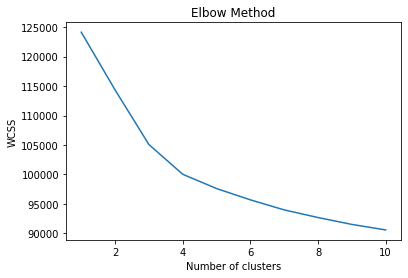

In [ ]:
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
#     kmeans.fit(X_train_wtv)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [ ]:
n_clusters = [3, 4]
for N in n_clusters:
    km = KMeans(
        n_clusters=N, init='k-means++',
        n_init=20, max_iter=500, 
        tol=1e-04, random_state=10,
        copy_x=False, n_jobs=-1
    )
    y_km = km.fit_predict(X_train_wtv)
    df_ksa["n{}_clusters".format(N)] = y_km
# df_clusters = pd.DataFrame({'message' :df_ksa.cleaned, 'topic_cluster' :y_km })

In [ ]:
df_ksa.sample(20, random_state=10).loc[:, ['cleaned', 'n3_clusters', 'n4_clusters']]

,cleaned,n3_clusters,n4_clusters
9389,Mohamed Fares,2,3
6073,Esraa Basyony,2,3
4996,Mahmoud Allam,2,3
15718,شكرا علي الرد,0,2
3414,اعاني من فيروس كبد B وقداستخدمت علاج يسمي لامفير لمدة سنتين وايضا عسل ولا يزال فيروس موجود فبما ...,1,2
11544,مواعيده في فرع معادي امتي لو سمحت,1,0
16417,500 الي 100 مكسمم ليه 200,1,2
11136,كم قيمة كشف واين عنوان,1,0
8481,تم ارسال اجابه اتمني فوز,1,2
10568,عندي خشونه جامده ومن سنتين اخذت حقنتين في ركبه ولسه تعبانه واخذت علاج كتير بدون فائده اعمل ايه,1,2


In [ ]:
df_ksa.head()

,file_name,message,cleaned,langs,cluster
0,Andalusia Polyclinics Page comments with post_id_col.xlsx,عزة فتحى,عزة فتحي,ar,0
1,Andalusia Polyclinics Page comments with post_id_col.xlsx,احمد اسماعيل,احمد اسماعيل,ar,1
2,Andalusia Polyclinics Page comments with post_id_col.xlsx,مافي خصم ٨٠٪ اكبر خصم عندكم ٣٠ ٪,مافي خصم ٨٠ اكبر خصم عندكم ٣٠,ar,0
3,Andalusia Polyclinics Page comments with post_id_col.xlsx,في تامين التعاونيه؟؟؟,في تامين التعاونيه,ar,0
4,Andalusia Polyclinics Page comments with post_id_col.xlsx,ايش هو العلاج حق ضعف الانتصاب,ايش هو العلاج حق ضعف الانتصاب,ar,0


##### Arabic only

In [ ]:
wtv_vect = WordVecVectorizer(word2vec)
X_ar = wtv_vect.transform(df_ar.cleaned)

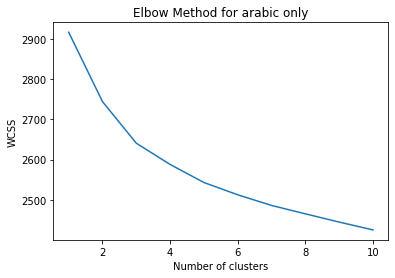

In [ ]:
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=10)
#     kmeans.fit(X_ar)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method for arabic only')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [ ]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=20, max_iter=500, 
    tol=1e-04, random_state=10,
    copy_x=False, n_jobs=-1
)
y_km = km.fit_predict(X_ar)
df_ar["clusters"] = y_km
df_ar.sample(20, random_state=10).loc[:, ['cleaned', 'clusters']]

,cleaned,clusters
15949,هي زارعه بتتعمل في يوم,2
8378,سلام عليكم هل يوجد دكتور عيون,2
7000,هذا اقل شيء ممكن يتقدم لمثل هؤلاء مخلصين يعلم الله اني فخور جدا بهم كوني اري نظاما وامانا ارجو ا...,2
279,ماشاء الله ربنا يوفقك يا رب فعلا احسن دكتوره,1
471,كلام جميل جدا,2
12854,موجود زراعه اسنان,0
17914,قبل احل,2
13111,بكام سعر فينير,0
12828,Mohamed Shamss اجهز عندك طالعه,2
3326,يا رب يشفي كل مريض يتالم بحق محمد وال محمد,1


### III. Sentiment classification

**Read Datasets**

In [ ]:
os.chdir('../Sentiment_task/')

In [ ]:
def read_train_data(path):
    df1 = pd.read_csv(os.path.join(path, "reviews.tsv"), sep='\t', header=None)
    # df1['rate'] = df1[0]
    df1['text'] = df1[4]
    df1['polarity'] = df1[0].apply(lambda x: 'pos' if x>=4 else 'neg' if x<=2 else 'neutral')# if x<=2 else 'neutral')
    df1 = df1.drop(columns=range(5))

    df2 = pd.DataFrame()
    path = os.path.join(path, 'reviews')
    for f in os.listdir(path):
        df2 = pd.concat([df2, pd.read_csv(os.path.join(path, f))], ignore_index=True)
    df2.drop(columns=['Unnamed: 0', 'restaurant_id', 'user_id'], inplace=True)
    df2['polarity'].replace({1: "pos", 0: "neutral", -1:"neg"}, inplace=True)
    return pd.concat((df1, df2), axis=0)

In [ ]:
df = read_train_data('data')
print(df.polarity.value_counts())
df.sample(5, random_state=10)

pos        75835
neg        17560
neutral    15360
Name: polarity, dtype: int64


,text,polarity
34199,شيق ولكن لا اعتقد بفكره تناسخ الارواح اطلاقا,neutral
19966,كلها رائعة. ولكن للنهاية كان وقع اخر . مختلف تماما. لم يؤثر شيء قرأته في حياتي علي يوما كما اثر...,pos
31041,للأسف لم يرقى للطموح فكانت البرقر ذات ملوحه زائده في برقر الدجاج \n ونكهة الفلفل سيئه \n أما برق...,neg
31457,"رواية رائعة من اكثر الجمل التى استوقفتنى قوله "" فى حياة كل امرئ منا خيط رفيع يربطه بالحياة ما ا...",pos
19280,بحبهااااااااااااااا:),pos


**adding twitter data**

In [ ]:
tw = pd.read_csv(os.path.join('data', "twitter.csv"))
# tw['polarity'].replace({'neutral': "neg"}, inplace=True)
samps = tw['polarity'].value_counts(sort=False)
inc = samps['neg']-samps['pos']
print(inc)
samps

885


neg        1684
pos         799
obj        6691
neutral     832
Name: polarity, dtype: int64

**Adding Samples for miss-labeled data**

In [ ]:
# msg = messages[df_ar["msg_stem_stop_words"].apply(lambda x: any(e in str(x).split() for e in ['وفق']))] # removed 'كام' for conflict with appointment inquiry
# print("# samples might be for Price inquiry", msg.count(), sep='\n')
# print("5 random samples:", msg.sample(5, random_state=10), sep='\n')
# msg = msg.sample(frac=0.5).rename('text')
# msg = pd.DataFrame(msg)
# msg["polarity"] = 'pos'
# msg.head()

# samples might be for Price inquiry
207
5 random samples:
1660                                            ربنايرض عنك ويوفقك ويفا د يكي يادكتورة\n
1928                                                  د هاني توفيق ربنا يحفظك ويبارك فيك
874                                                                    بداية موفقة يارب 
548     دكتوره وانسانه في غايه اعلي المراتب الانسانيه ربنا يوفقك  دائمآ بالنجاح والتوفيق
1766                                           بالتوفيق دايما لأحلى دكتورة Rasha Shehawy
Name: message, dtype: object


,text,polarity
878,بالتوفيق يا دكتور ربنا يكرمك ويوفقك أن شاء الله,pos
2488,احسن دكتوره عرفتها في حياتي والله \nربنا يوفقك يارب,pos
1971,بالتوفيق والنجاح دايما يارب,pos
2429,دايما موفق يا رب,pos
2947,دكتور محترم جدا وأخلاق ومخلص لعمله ربنا يكرمه ويوفقة,pos


**Adding Manually corrected samples**

In [ ]:
msg = pd.read_excel("data/Comments_corrected.xlsx", sheet_name="Sheet1")
samps = msg['polarity'].value_counts(sort=False)
print(samps)
dec = samps['pos'] - samps['neg']
print(dec)
msg.sample(5, random_state=10)

neg      13
pos     751
obj    3067
Name: polarity, dtype: int64
738


,text,polarity
1462,المواعيد وسعر الكشف,obj
2783,فيه فرع بني سويف,obj
3231,الكشف لكام ةالحشو,obj
1198,جرين بيل,obj
372,بكم الجلسه,obj


**Balancing Data**

In [ ]:
pos_count = df.query("polarity=='pos'").shape[0]
neg_count = df.query("polarity=='neg'").shape[0]

neg_count -= 20000
print("Before balancing", df['polarity'].value_counts(sort=False), sep='\n')
# balancing polarity
revs = pd.concat([df.query("polarity=='pos'").sample(n=neg_count+inc-dec), df.query("polarity=='neg'").sample(n=neg_count), msg, tw]).sample(frac=1).reset_index(drop=True)
print("", "After balancing", revs['polarity'].value_counts(sort=False), sep='\n')
revs

Before balancing
pos    75835
neg    32920
Name: polarity, dtype: int64

After balancing
pos    15449
obj     9758
neg    15449
Name: polarity, dtype: int64


,text,polarity
0,روايه تحفه وبسيطه حسيت انى وبطل القصه واحد . بس لما اتعملت مسلسل اتشوهت . ومقدرش انقد الروايه ل...,pos
1,حاجة خفيفة كدة تتقري بين كتابين أو جنب كتاب تقيل لذيذ يعني,neg
2,هو كتاب فعلا عبقرى ماسمى هذة الشخصية وما اعظمها عمر بن الخطاب وُلد ليكون قائدا ولا شئ اخر غير ذ...,pos
3,كذب الاهرام نفس صورة الاسلحة المضبوطة في عمان,obj
4,بيدونا اجازة فى عيد العمال عشان نقعد فى البيت نتفرج على فيلم الايدى الناعمة،حرام والله #أوقفوا_ا...,neg
...,...,...
40651,الودبات الايطالية \nمطاهم راقية تقدم وجبا ايطالبة و خصوصا البيتزا و المعجنات انصح بطلب البيتزات ...,pos
40652,بدأت بقراءة الكتاب بحماس كبير لكن سرعان ما هبط هذا الحماس لأدنى مستوياته عند قراءة أول فصلين من...,neg
40653,#اعترافات_الطفولة حرامي دجااج,obj
40654,لم يخطر ببالي يوماً اني قد اتذوق ستيكاً بهذه الجودة،، فعلا من اجمل تجارب الستيك التي مررت بها، ع...,pos


In [ ]:
tw.query("text=='"+revs.iloc[17590].text+"'")

,text,polarity
4093,== #زب #سالب #مخانيث #زواج #بزاز #دلوعة #أسوان #تونس,obj


In [ ]:
# !pip install xlsxwriter
pd.concat([df, msg, tw]).sample(frac=1).to_csv("../new_datasets//Unbalanced_mixed_reviews.csv", index=False)


#### Save / restore dataframe

In [ ]:
revs.to_csv("../new_datasets/combined_sets_mod.csv", index=False)

In [ ]:
# revs = pd.read_csv("../Sentiment_task/data/Full_mixed_reviews.csv", index_col="Unnamed: 0")
revs = pd.read_csv("../new_datasets/combined_sets_5.csv")#, index_col=0)
revs.shape

(22935, 2)

In [ ]:
revs.sample(5, random_state=43)

,text,polarity
9516,المواعيد و قيمة الكشف وكيفية الحجز,obj
12312,الرباط الصليبي بيتكلف كام,obj
20701,ممكن سعر الكشف و العنوان,obj
20317,ام اريج,obj
2542,جيت المركز يوم الاربعاء القادم وعملت كشف ودخلت للدكتوره وعملت اشعة وقررت ان دكتور التقويم لازم ي...,neg


Text(0, 0.5, 'Label')

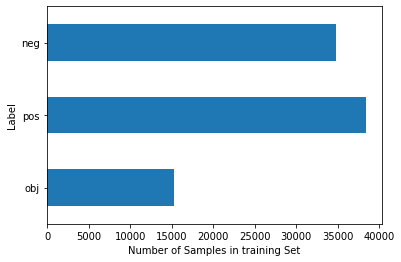

In [ ]:
ax = revs['polarity'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")


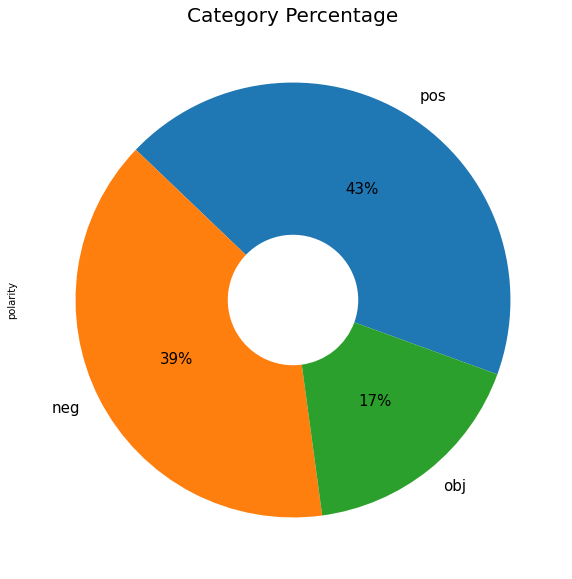

In [ ]:
viz = revs.polarity.value_counts()
plt.figure(figsize=(30,10))
plt.title('Category Percentage', fontsize=20)
viz.plot(kind='pie', labels=viz.index,
                            wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                            textprops={'fontsize': 15})

In [ ]:
revs.replace({'neutral': 'neg'}, inplace=True)
n_count = revs.query("polarity=='neg'").shape[0]
pos = revs.query("polarity=='pos'").sample(n=n_count, random_state=43)
revs = pd.concat([pos, revs.query("polarity!='pos'")], axis=0).sample(frac=1, random_state=43)
revs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19373 entries, 11983 to 16129
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      19372 non-null  object
 1   polarity  19373 non-null  object
dtypes: object(2)
memory usage: 454.1+ KB


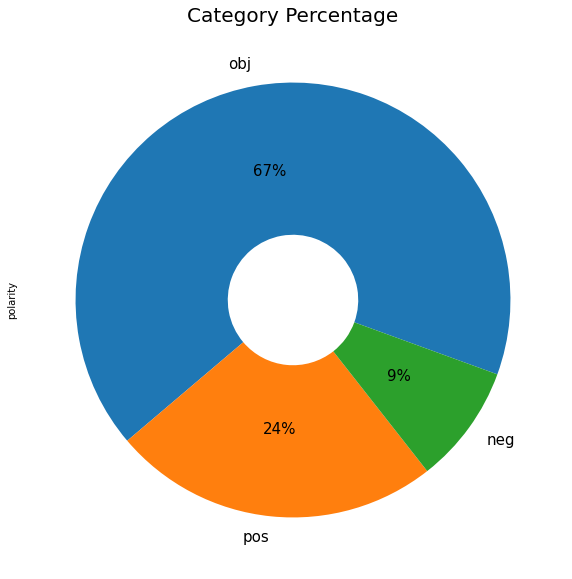

In [ ]:
# revs.replace({'neutral': 'neg'}, inplace=True)
viz = revs.polarity.value_counts()
plt.figure(figsize=(30,10))
plt.title('Category Percentage', fontsize=20)
viz.plot(kind='pie', labels=viz.index,
                            wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                            textprops={'fontsize': 15})

##### **Test Lexicon-based method**

In [ ]:
revs.columns

Index(['polarity'], dtype='object')

In [ ]:
lex = pd.read_csv("../Sentiment_KSA/created_data/Full_lexicons.csv", index_col="lexicon")
revs['lex_sentiment'] = revs.cleaned.astype(str).map(lambda x: sum([lex.loc[w].polarity if w in lex.index else 0 for w in get_all_ngrams(x, nrange=3)])).map(lambda x: 'pos' if x>0 else 'neg' if x<0 else 'NUETRAL')
revs.lex_sentiment.value_counts()

neg        110461
pos         69225
NUETRAL     46140
Name: lex_sentiment, dtype: int64

In [ ]:
lex = pd.read_csv("../Sentiment_KSA/created_data/uncleaned_lexicons.csv", index_col="lexicon")
revs['lex_sentiment'] = revs.text.astype(str).map(lambda x: sum([lex.loc[w].polarity if w in lex.index else 0 for w in get_all_ngrams(x, nrange=3)])).map(lambda x: 'pos' if x>0 else 'neg' if x<0 else 'NUETRAL')
revs.lex_sentiment.value_counts()

neg        17199
pos        11921
NUETRAL    11536
Name: lex_sentiment, dtype: int64

In [ ]:
get_all_ngrams("hi me and no")

['hi',
 'me',
 'and',
 'no',
 'hi_me',
 'me_and',
 'and_no',
 'hi_me_and',
 'me_and_no']

In [ ]:
revs['lex_sentiment'].replace({'NUETRAL': 'obj'}, inplace=True)

0.5839230203785215


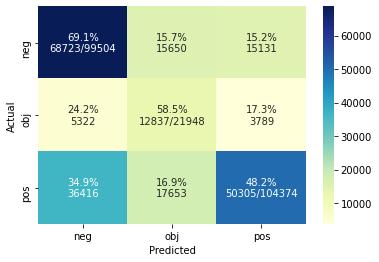

In [ ]:
print(accuracy_score(revs.polarity, revs.lex_sentiment))
plot_cm(revs.polarity, revs.lex_sentiment)

#### **Preprocessing**

In [ ]:
if VER == 3:
    revs["cleaned"] = revs.text.apply(lambda x: remove_longation(str(x), prefix=True)).tolist()
else:
    revs["cleaned"] = revs.text.apply(lambda x: remove_longation(str(x))).tolist()
# msg_words = stem(revs.text) #lemma
# msg_words = remove_stopwords(msg_words)
# revs["msg_stem_stop_words"] = msg_words
# del msg_words
# revs = revs[revs['msg_stem_stop_words'].map(len) >= 3]
print("\n5 random samples:")
revs.sample(5, random_state=43)


5 random samples:


,text,polarity,cleaned
9516,المواعيد و قيمة الكشف وكيفية الحجز,obj,المواعيد و قيمة الكشف وكيفية الحجز
12312,الرباط الصليبي بيتكلف كام,obj,الرباط الصليبي بيتكلف كام
20701,ممكن سعر الكشف و العنوان,obj,ممكن سعر الكشف و العنوان
20317,ام اريج,obj,ام اريج
2542,جيت المركز يوم الاربعاء القادم وعملت كشف ودخلت للدكتوره وعملت اشعة وقررت ان دكتور التقويم لازم ي...,neg,جيت المركز يوم الاربعاء القادم وعملت كشف ودخلت للدكتوره وعملت اشعة وقرت ان دكتور التقويم لازم يق...


#### **Hypertunning**

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# from sklearn.linear_model import Perceptron
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.decomposition import PCA
# from sklearn.decomposition import SparsePCA
# from sklearn import metrics
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import f_classif
# from sklearn.ensemble.forest import RandomForestClassifier
# from numpy.lib.scimath import sqrt
# from numpy.ma.core import floor
# from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Lasso
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn import svm
# from sklearn import preprocessing
# from pickle import FALSE
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import PassiveAggressiveClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# # from sklearn import cross_validation
# from sklearn.manifold import Isomap
# from sklearn.manifold import SpectralEmbedding
# from sklearn.decomposition import TruncatedSVD


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# # an = analex.Analex()
# tokenizer = str.split #an.text_tokenize
# Features_Generators = [
#     dict(name="count_ng1",
#          feat_generator=CountVectorizer(tokenizer=tokenizer, ngram_range=(1, 1))),
#     dict(name="count_ng2",
#          feat_generator=CountVectorizer(tokenizer=tokenizer, ngram_range=(1, 2))),
#     dict(name="count_ng3",
#          feat_generator=CountVectorizer(tokenizer=tokenizer, ngram_range=(1, 3))),
#     dict(name="tfidf_ng1",
#          feat_generator=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1, 1))),
#     dict(name="tfidf_ng2",
#          feat_generator=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1, 2))),
#     dict(name="tfidf_ng3",
#          feat_generator=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1, 3))),
# ]

# # classifiers
# classifiers = [   dict(name="Logistic Regression", parameter_tunning=False,
#          tune_clf=GridSearchCV(LogisticRegression(), [{'penalty': ['l2'], 'C': [1, 10, 100]}], cv=3),
#          clf=LogisticRegression(penalty='l2', C=1)),
#     dict(name="Passive Aggresive", parameter_tunning=False, clf=PassiveAggressiveClassifier()),
#     dict(name="SVM", parameter_tunning=False, clf=LinearSVC(loss='squared_hinge', penalty="l2", dual=False, tol=1e-3)), #loss='l2' #old
#     dict(name="Perceptron", parameter_tunning=False, clf=Perceptron()),#max_iter=100
#     dict(name="xgboost", parameter_tunning=False, clf=XGBClassifier()),#max_depth=100
#     dict(name="randomForest", parameter_tunning=False, clf=RandomForestClassifier()),
#     #
#     dict(name="bnb", parameter_tunning=False, clf=BernoulliNB(binarize=0.5)),
#     dict(name="mnb", parameter_tunning=False, clf=MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
#     dict(name="sgd", parameter_tunning=False, clf=SGDClassifier(loss="hinge", penalty="l2")),
#     dict(name="KNN", parameter_tunning=False, tune_clf=GridSearchCV(KNeighborsClassifier(),
#         [{'n_neighbors': [5, 10, 50, 100], 'metric': ['euclidean', 'minkowski'], 'p': [2, 3, 4, 5]}], cv=5),
#          clf=KNeighborsClassifier(n_neighbors=5, metric='euclidean')),

# ]


In [ ]:
# from sklearn.metrics import f1_score
# # an = analex.Analex()
# tokenizer = str.split #an.text_tokenize
# models = []
# samples = revs#.sample(50000)
# for feat_generator in Features_Generators:
#     # tfidf = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=ngram, max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
#     t = time()
#     X = feat_generator['feat_generator'].fit_transform(samples.msg_stem_stop_words)
#     X_train, X_val, y_train, y_val = train_test_split(X, samples.polarity, test_size=0.2)    
#     for clf in classifiers:
#             # clf = svm.SVC(kernel=kernel)
#             clf['clf'].fit(X_train, y_train)
#             models.append(clf['clf'])
#             print('\nModel-ng={}-ker={}'.format(feat_generator['name'], clf['name']))
#             print("time:",time()-t)
#             predictions = clf['clf'].predict(X_val)
#             print(confusion_matrix(y_val,predictions))  
#             print("F1-score:", f1_score(y_val,predictions, average='weighted'))  
#             print("Accuracy:",accuracy_score(y_val, predictions))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=count_ng1-ker=Logistic Regression
time: 10.162195920944214
[[1980  321  717]
 [ 217 1604  126]
 [ 787  210 2170]]
F1-score: 0.7065195651163838
Accuracy: 0.7075750122970978

Model-ng=count_ng1-ker=Passive Aggresive
time: 12.063017845153809
[[1838  302  878]
 [ 276 1430  241]
 [ 799  185 2183]]
F1-score: 0.6700793390370734
Accuracy: 0.6703148057058534


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Model-ng=count_ng1-ker=SVM
time: 74.35150122642517
[[1966  296  756]
 [ 266 1511  170]
 [ 804  183 2180]]
F1-score: 0.6955054380196033
Accuracy: 0.6956468273487457

Model-ng=count_ng1-ker=Perceptron
time: 75.37702107429504
[[2057  267  694]
 [ 359 1377  211]
 [ 987  180 2000]]
F1-score: 0.6691927119624271
Accuracy: 0.6682242990654206

Model-ng=count_ng1-ker=xgboost
time: 98.663503408432
[[1776  740  502]
 [ 119 1794   34]
 [ 992  582 1593]]
F1-score: 0.6272017911245876
Accuracy: 0.6348991637973438

Model-ng=count_ng1-ker=randomForest
time: 290.76993203163147
[[2005  307  706]
 [ 206 1557  184]
 [ 837  129 2201]]
F1-score: 0.7085140000312108
Accuracy: 0.7086817511067388

Model-ng=count_ng1-ker=bnb
time: 291.71823382377625
[[1328 1094  596]
 [  14 1918   15]
 [ 567 1004 1596]]
F1-score: 0.585406591784215
Accuracy: 0.5954254795868175

Model-ng=count_ng1-ker=mnb
time: 291.89620900154114
[[1958  311  749]
 [ 254 1481  212]
 [ 758  167 2242]]
F1-score: 0.6984105784486481
Accuracy: 0.6985981

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=count_ng2-ker=Logistic Regression
time: 63.014323711395264
[[2099  358  644]
 [ 159 1655  123]
 [ 615  189 2290]]
F1-score: 0.7417514203906395
Accuracy: 0.7432365961633055

Model-ng=count_ng2-ker=Passive Aggresive
time: 65.12201380729675
[[1998  322  781]
 [ 246 1510  181]
 [ 678  172 2244]]
F1-score: 0.7065684820781111
Accuracy: 0.7073290703394

Model-ng=count_ng2-ker=SVM
time: 376.47591376304626
[[2074  341  686]
 [ 173 1611  153]
 [ 667  182 2245]]
F1-score: 0.7280071737583929
Accuracy: 0.7292179045745204

Model-ng=count_ng2-ker=Perceptron
time: 378.07387351989746
[[2140  276  685]
 [ 274 1476  187]
 [ 690  144 2260]]
F1-score: 0.7226954916313534
Accuracy: 0.7225774717166749

Model-ng=count_ng2-ker=xgboost
time: 600.841227054596
[[1808  794  499]
 [ 103 1799   35]
 [ 879  584 1631]]
F1-score: 0.6376484972557466
Accuracy: 0.6441219872110182

Model-ng=count_ng2-ker=randomForest
time: 2855.4201605319977
[[2066  395  640]
 [ 159 1626  152]
 [ 791  181 2122]]
F1-score: 0.713499

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=count_ng3-ker=Logistic Regression
time: 130.53377223014832
[[2121  351  621]
 [ 168 1687  111]
 [ 631  193 2249]]
F1-score: 0.7434435077622106
Accuracy: 0.7448352188883424

Model-ng=count_ng3-ker=Passive Aggresive
time: 134.70252752304077
[[2055  318  720]
 [ 258 1503  205]
 [ 759  186 2128]]
F1-score: 0.6990207810681193
Accuracy: 0.6992129857353665

Model-ng=count_ng3-ker=SVM
time: 768.5896141529083
[[2047  354  692]
 [ 173 1631  162]
 [ 656  200 2217]]
F1-score: 0.7235723602690682
Accuracy: 0.7249139203148057

Model-ng=count_ng3-ker=Perceptron
time: 771.1035397052765
[[2132  215  746]
 [ 299 1426  241]
 [ 644  124 2305]]
F1-score: 0.7214383536116593
Accuracy: 0.720978848991638

Model-ng=count_ng3-ker=xgboost
time: 1324.0309484004974
[[1819  759  515]
 [ 106 1822   38]
 [ 886  570 1617]]
F1-score: 0.6396259059265298
Accuracy: 0.646581406787998

Model-ng=count_ng3-ker=randomForest
time: 6985.256078958511
[[2032  388  673]
 [ 181 1603  182]
 [ 788  177 2108]]
F1-score: 0.70508

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=tfidf_ng1-ker=Logistic Regression
time: 11.616519212722778
[[2118  321  680]
 [ 178 1696   90]
 [ 720  174 2155]]
F1-score: 0.7324928556289559
Accuracy: 0.7340137727496311

Model-ng=tfidf_ng1-ker=Passive Aggresive
time: 13.65174913406372
[[1985  262  872]
 [ 290 1458  216]
 [ 802  168 2079]]
F1-score: 0.6793846033025472
Accuracy: 0.6790457452041319

Model-ng=tfidf_ng1-ker=SVM
time: 15.44552230834961
[[2093  275  751]
 [ 214 1617  133]
 [ 706  163 2180]]
F1-score: 0.7235880804964975
Accuracy: 0.7242990654205608

Model-ng=tfidf_ng1-ker=Perceptron
time: 16.084158897399902
[[1985  249  885]
 [ 319 1443  202]
 [ 815  165 2069]]
F1-score: 0.6765531688423513
Accuracy: 0.6759714707329071

Model-ng=tfidf_ng1-ker=xgboost
time: 59.338651180267334
[[1830  773  516]
 [  92 1841   31]
 [ 852  524 1673]]
F1-score: 0.6506065894138782
Accuracy: 0.6571569109690113

Model-ng=tfidf_ng1-ker=randomForest
time: 237.42586636543274
[[2075  377  667]
 [ 165 1670  129]
 [ 745  153 2151]]
F1-score: 0.72

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=tfidf_ng2-ker=Logistic Regression
time: 62.151023626327515
[[2161  342  578]
 [ 186 1688   82]
 [ 671  195 2229]]
F1-score: 0.7462434977410095
Accuracy: 0.7474176094441711

Model-ng=tfidf_ng2-ker=Passive Aggresive
time: 63.38266468048096
[[2078  302  701]
 [ 196 1628  132]
 [ 641  187 2267]]
F1-score: 0.7334416403602015
Accuracy: 0.7345056566650271

Model-ng=tfidf_ng2-ker=SVM
time: 70.40996956825256
[[2150  309  622]
 [ 178 1677  101]
 [ 634  184 2277]]
F1-score: 0.7494895680439491
Accuracy: 0.750614854894245

Model-ng=tfidf_ng2-ker=Perceptron
time: 71.15673232078552
[[1999  329  753]
 [ 190 1615  151]
 [ 595  205 2295]]
F1-score: 0.7250830952047648
Accuracy: 0.7266355140186916

Model-ng=tfidf_ng2-ker=xgboost
time: 336.31861448287964
[[1822  754  505]
 [ 101 1821   34]
 [ 921  532 1642]]
F1-score: 0.6429362483987905
Accuracy: 0.6499016232169208

Model-ng=tfidf_ng2-ker=randomForest
time: 2605.1152725219727
[[2053  398  630]
 [ 162 1663  131]
 [ 811  187 2097]]
F1-score: 0.7131

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Model-ng=tfidf_ng3-ker=Logistic Regression
time: 140.46474289894104
[[2194  326  552]
 [ 186 1680   93]
 [ 776  191 2134]]
F1-score: 0.7377105866207411
Accuracy: 0.7388096409247418

Model-ng=tfidf_ng3-ker=Passive Aggresive
time: 142.61455368995667
[[2083  313  676]
 [ 157 1683  119]
 [ 686  189 2226]]
F1-score: 0.7353672572442618
Accuracy: 0.7368421052631579

Model-ng=tfidf_ng3-ker=SVM
time: 159.17082047462463
[[2148  320  604]
 [ 153 1708   98]
 [ 708  185 2208]]
F1-score: 0.7442727956238647
Accuracy: 0.7456960157402853

Model-ng=tfidf_ng3-ker=Perceptron
time: 160.40911626815796
[[2051  299  722]
 [ 162 1644  153]
 [ 682  190 2229]]
F1-score: 0.7272325722435522
Accuracy: 0.7284800787014265

Model-ng=tfidf_ng3-ker=xgboost
time: 763.8503561019897
[[1805  728  539]
 [  89 1844   26]
 [ 980  515 1606]]
F1-score: 0.6377516197157618
Accuracy: 0.6462124938514511

Model-ng=tfidf_ng3-ker=randomForest
time: 6262.765538692474
[[2017  398  657]
 [ 130 1700  129]
 [ 831  185 2085]]
F1-score: 0.71

In [ ]:
vec = 5
clas = 3
models[(vec-1) * len(classifiers) + clas-1]

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)

#### **Vectorization**

In [ ]:
flag_tfidf = False
flag_lstm = True
t = time()
if flag_tfidf:
    # Using TFIDF vectorizer
    # an = analex.Analex()
    tokenizer = str.split #an.text_tokenize
    tfidf = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=(1,2), max_features=5000, max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
    X = tfidf.fit_transform(revs.msg_stem_stop_words)
else:
    # Using Word2Vec
    wtv_vect = WordVecVectorizer(word2vec)
    X = wtv_vect.instance_transform(revs.cleaned.astype(str)) if flag_lstm else wtv_vect.transform(revs.cleaned.astype(str))
print(time()-t)
X_train, X_val, y_train, y_val = train_test_split(X, revs.polarity, test_size=0.2, random_state=10)


2.2139973640441895


In [ ]:
X.shape[0] - X.any(1).sum()

-6798765

In [ ]:
X.shape

(22935, 50, 300)

##### SAVE TFIDF

In [ ]:
import pickle
with open(os.path.join('../Sentiment_task/models', 'tfidf_features.pkl'), 'wb') as fid:
    pickle.dump(tfidf.vocabulary_, fid)    
    pickle.dump(tfidf.idf_, fid)

In [ ]:
flag_tfidf = True
with open(os.path.join('../Sentiment_task/models', 'tfidf_features.pkl'), 'rb') as fid:
    vocabulary = pickle.load(fid)
    idfs = pickle.load(fid)

In [ ]:
tokenizer = str.split
tfidf = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=(1,2), max_features=5000, vocabulary=vocabulary , max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
tfidf.idf_=idfs

In [ ]:
X = tfidf.fit_transform(revs.msg_stem_stop_words)
X_train, X_val, y_train, y_val = train_test_split(X, revs.polarity, test_size=0.2, random_state=10)

In [ ]:
# (tfidf.transform(revs.msg_stem_stop_words[:3]).toarray()==tfidf2.transform(revs.msg_stem_stop_words[:3]).toarray()).all()

True

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(18348, 50, 300)
(18348,)
(4587, 50, 300)
(4587,)


In [ ]:
# import numpy as np

# X_train.__sizeof__()/ np.prod(X_train.shape)
225823*50*300*8/1024/1024/1024
225823 - 20 *1024*1024*1024/8/300/50

46866.02933333334

#### **Machine learning (SVM) model**

##### **Model Train**

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### **Performance metrics**

In [ ]:
predictions = clf.predict(X_val)

print(confusion_matrix(y_val,predictions))
print(classification_report(y_val,predictions))
print(accuracy_score(y_val, predictions))

[[ 319   67   33]
 [  22 2985   85]
 [  50  162  864]]
              precision    recall  f1-score   support

         neg       0.82      0.76      0.79       419
         obj       0.93      0.97      0.95      3092
         pos       0.88      0.80      0.84      1076

    accuracy                           0.91      4587
   macro avg       0.87      0.84      0.86      4587
weighted avg       0.91      0.91      0.91      4587

0.9086548942664051


In [ ]:
# print('              precision    recall  f1-score   support\n\n         neg       0.79      0.47      0.59      4127\n         pos       0.78      0.94      0.86      8525\n\n    accuracy                           0.79     12652\n   macro avg       0.79      0.70      0.72     12652\nweighted avg       0.79      0.79      0.77     12652\n')

In [ ]:
pd.Series(predictions).value_counts()

obj    3214
pos     982
neg     391
dtype: int64

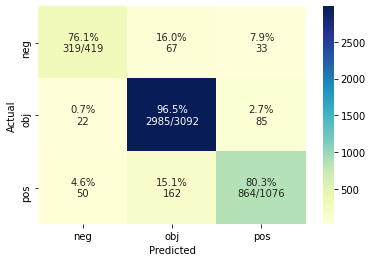

In [ ]:
plot_cm( y_val,  predictions)

##### Save / restore SVM model

In [ ]:
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
models_path=os.path.join(curDir,'models')
if not os.path.exists(models_path):
    os.makedirs(models_path)

In [ ]:
import pickle
with open(os.path.join(models_path, 'svm_classifier_w2v.sav'), 'wb') as fid:
    pickle.dump(clf, fid)    


In [ ]:
# load it again
with open(os.path.join(models_path, 'svm_classifier_w2v.sav'), 'rb') as fid:
    clf = pickle.load(fid)

#### **Deep Learning Model**

##### Preparing data

In [ ]:
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
    X_val = X_val.toarray()
labelencoder = LabelEncoder()
l = list(set(y_train))
l.sort()
y_train = to_categorical(labelencoder.fit_transform(y_train))
y_val = to_categorical(labelencoder.transform(y_val))
int_category = dict(zip(labelencoder.transform(l), l))
category_int = dict(zip(l, labelencoder.transform(l)))
cats = len(category_int)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape) 

3
(18348, 50, 300)
(18348, 3)
(4587, 50, 300)
(4587, 3)


In [ ]:
print(int_category)
classes = revs.polarity.value_counts()
print(classes.to_dict())
print(category_int)
class_weight = dict(map(lambda x: (category_int[x[0]], (1 / x[1])*(classes.sum())*2.0), classes.items()))
class_weight

{0: 'neg', 1: 'obj', 2: 'pos'}
{'obj': 15311, 'pos': 5593, 'neg': 2031}
{'neg': 0, 'obj': 1, 'pos': 2}


{0: 22.58493353028065, 1: 2.9958853112141597, 2: 8.201323082424459}

##### Model Build

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, GlobalMaxPool1D
# inp = np.random.randn(100, 5, 16)
# input = Input(inp.shape[1:])
# lstm = keras.layers.LSTM(8, dropout=0.3, return_sequences=True)
# out = keras.layers.SimpleRNN(3)
# out(lstm(input)).shape

In [ ]:
def modelBuild(input_shape, layers, dense_out, lstm=False, name=None):
    NumLyrs = len(layers)
    sentence_indices = Input(input_shape, name="input")
    X = sentence_indices
    dense_start = 0
    if lstm:
        X = Bidirectional(LSTM(layers[0], dropout=0.45, return_sequences=True, name="lstm_1"), 
                        #   backward_layer=LSTM(layers[0], activation='relu', return_sequences=True,  go_backwards=True, name="lstm_2"), 
                          name="bidirectional")(X)
        X = GlobalMaxPool1D(name="global_max_pooling1d")(X)
        # X = SimpleRNN(layers[0], dropout=0.55)(X)
        dense_start += 1
    # The returned output should be a batch of sequences.
    for layer in range(dense_start, NumLyrs):
        X = Dense(layers[layer], activation='relu', name="dense_{}".format(layer))(X)
        X = Dropout(0.45, name="dropout_{}".format(layer))(X)
    X = Dense(dense_out, activation='softmax', name="dense_{}".format(NumLyrs))(X) # Number of classes
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=sentence_indices, outputs=X, name=name)
    return model

##### Hyper tuning

In [ ]:
layers = [
        #   [512, 256, 128, 64, 32],
          [64, 64, 64],
          [256, 64, 16],
          [256, 128, 256, 64],
          [128, 128, 64, 64],
          [256, 16],
          [128, 512, 256, 64],
          [256, 256, 256],
          [256, 256, 128],
          [256, 128, 128],
          [256, 256],
          [128, 128],
          [64, 32],
          [128, 32],
          ]
cats = len(int_category)
input_shape = X_train.shape[1:]

In [ ]:
min_score = 1000
max_acc = 0
i = 1
for dense_layers in layers:
    for opt in [Adam, Adamax]:
        for batch_size in [256, 1024, 2048]:
            for lr in [1e-2, 1e-3, 1e-4]:
                for decay in [1e-7]:
                    model = modelBuild(input_shape, dense_layers, cats, lstm=True, name='model_{}'.format(1))
                    print('model_{}'.format(i))
                    print("layers:", dense_layers)
                    optimizer = opt(lr=lr, decay=decay, name=str(opt).split(".")[-1].split("'")[0])
                    parameters = [dense_layers, optimizer.get_config()['name'], batch_size, lr, decay, int_category]
                    print("optimizer:", optimizer.get_config()['name'])
                    print("batch_size={}, learning_rate={}, decay={}".format(batch_size, lr, decay))
                    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                    # Train model
                    tbCallBack = TensorBoard(log_dir='log', histogram_freq=0, write_graph=False, write_images=True)
                    earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)

                    history = model.fit(X_train,
                                        y_train,
                                        epochs=500,
                                        batch_size=batch_size,
                                        validation_data=(X_val, y_val),
                                        shuffle=True,
                                        verbose = 2,
                                        callbacks=[tbCallBack,earlystop])

                    score, acc = model.evaluate(X_val, y_val, batch_size=256)   
                    print('Score: %1.4f' % score)
                    print('Accuracy: %1.4f' % acc)
                    if score < min_score:
                        min_score = score
                        best_score_model = model
                        save_keras_model(best_score_model, 
                                         {"param": parameters, "score": score, "acc": acc}, 
                                         model_name='best_score_FCNN')
                        print("-----------------------------------------> BEST SCORE", score)
                    if acc > max_acc:
                        max_acc = acc
                        best_acc_model = model
                        save_keras_model(best_acc_model, 
                                         {"param": parameters, "score": score, "acc": acc},
                                         model_name='best_acc_FCNN')
                        print("-----------------------------------------> BEST ACC", acc)
                    i += 1
                    print("============================================================\n")


# save_keras_model(best_score_model, model_name='best_score_FCNN')
# save_keras_model(best_acc_model, model_name='best_acc_FCNN')


Streaming output truncated to the last 5000 lines.
9/9 - 1s - loss: 1.0398 - accuracy: 0.5687 - val_loss: 1.0271 - val_accuracy: 0.6743
Epoch 4/500
9/9 - 1s - loss: 1.0206 - accuracy: 0.5948 - val_loss: 1.0059 - val_accuracy: 0.6741
Epoch 5/500
9/9 - 1s - loss: 1.0016 - accuracy: 0.6057 - val_loss: 0.9845 - val_accuracy: 0.6741
Epoch 6/500
9/9 - 1s - loss: 0.9835 - accuracy: 0.6142 - val_loss: 0.9629 - val_accuracy: 0.6741
Epoch 7/500
9/9 - 1s - loss: 0.9632 - accuracy: 0.6201 - val_loss: 0.9406 - val_accuracy: 0.6741
Epoch 8/500
9/9 - 1s - loss: 0.9505 - accuracy: 0.6212 - val_loss: 0.9181 - val_accuracy: 0.6741
Epoch 9/500
9/9 - 1s - loss: 0.9317 - accuracy: 0.6227 - val_loss: 0.8948 - val_accuracy: 0.6741
Epoch 10/500
9/9 - 1s - loss: 0.9147 - accuracy: 0.6277 - val_loss: 0.8681 - val_accuracy: 0.6741
Epoch 11/500
9/9 - 1s - loss: 0.8951 - accuracy: 0.6284 - val_loss: 0.8324 - val_accuracy: 0.6765
Epoch 12/500
9/9 - 1s - loss: 0.8663 - accuracy: 0.6290 - val_loss: 0.7883 - val_accur

In [ ]:
print(min_score, max_acc)
print(best_acc_model.name)
print(best_score_model.name)

0.45755207538604736 0.7920781373977661
model_143
model_143


In [ ]:
best_score_parameters['param']

[[256, 256], 'Adamax', 1024, 0.01, 1e-07, {0: 'neg', 1: 'obj', 2: 'pos'}]

##### Training

In [ ]:
best_score_model, best_score_parameters = load_keras_model('best_score_FCNN')
print(best_score_parameters)
print(best_score_model.summary())
"""
[128, 512, 256, 64]
<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f53303afc88>
batch_size=128, learning_rate=0.0005, decay=1e-09
loss: 0.5683 - accuracy: 0.7449
"""
best_acc_model, best_acc_parameters = load_keras_model('best_acc_FCNN')
print(best_acc_parameters)
print(best_acc_model.summary())
"""
[64, 64, 64]
"""
# last documented"
"""
[128, 512, 256, 64]
SGD 
batch_size=256, learning_rate=0.01, decay=1e-07
"""
print()

{'param': [[256, 256], 'Adamax', 1024, 0.01, 1e-07, {0: 'neg', 1: 'obj', 2: 'pos'}], 'score': 0.21245937049388885, 'acc': 0.9215173125267029}
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_175 (InputLayer)       [(None, 50, 300)]         0         
_________________________________________________________________
bidirectional_174 (Bidirecti (None, 50, 512)           1140736   
_________________________________________________________________
global_max_pooling1d_174 (Gl (None, 512)               0         
_________________________________________________________________
dense_546 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_372 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_547 (Dense)            (None, 3)           

In [ ]:
dense_layers, opt_name, batch_size, lr, decay, int_category = best_score_parameters['param']

# batch_size = 256
# lr = 1e-4
# decay = 1e-7
# dense_layers = [256, 256]
cats = len(int_category)

input_shape = X_train.shape[1:]
if flag_lstm:
    model = modelBuild(input_shape, dense_layers, cats, lstm=True, name="model")
else:
    model = modelBuild(input_shape, dense_layers, cats, name='model') #best_score_model
print(model.summary())
if opt_name=='Adamax':
    opt = Adamax(lr=lr, decay=decay)
else:
    opt = Adam(lr=lr, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 50, 300)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 512)           1140736   
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 1,272,835
Trainable params: 1,272,835
Non-trainable params: 0
___________________________________________________

In [ ]:
# Train model
tbCallBack = TensorBoard(log_dir='log', histogram_freq=0, write_graph=False, write_images=True)
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=2, restore_best_weights=True)
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose = 2,
                    callbacks=[tbCallBack,earlystop],
                    class_weight=class_weight,
                    )



Epoch 1/200
18/18 - 6s - loss: 4.4134 - accuracy: 0.6679 - val_loss: 0.4757 - val_accuracy: 0.8210
Epoch 2/200
18/18 - 2s - loss: 2.6854 - accuracy: 0.8351 - val_loss: 0.3448 - val_accuracy: 0.8679
Epoch 3/200
18/18 - 2s - loss: 2.3628 - accuracy: 0.8592 - val_loss: 0.2968 - val_accuracy: 0.8906
Epoch 4/200
18/18 - 2s - loss: 2.2141 - accuracy: 0.8696 - val_loss: 0.3275 - val_accuracy: 0.8760
Epoch 5/200
18/18 - 2s - loss: 2.1743 - accuracy: 0.8720 - val_loss: 0.2654 - val_accuracy: 0.9002
Epoch 6/200
18/18 - 2s - loss: 2.0094 - accuracy: 0.8811 - val_loss: 0.2653 - val_accuracy: 0.9002
Epoch 7/200
18/18 - 2s - loss: 1.8420 - accuracy: 0.8891 - val_loss: 0.2518 - val_accuracy: 0.9089
Epoch 8/200
18/18 - 2s - loss: 1.8025 - accuracy: 0.8905 - val_loss: 0.2450 - val_accuracy: 0.9104
Epoch 9/200
18/18 - 2s - loss: 1.6406 - accuracy: 0.8978 - val_loss: 0.2631 - val_accuracy: 0.9010
Epoch 10/200
18/18 - 2s - loss: 1.5392 - accuracy: 0.9043 - val_loss: 0.2601 - val_accuracy: 0.9023
Epoch 11/

In [ ]:
score, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
parameters = {"param": [dense_layers, opt_name, batch_size, lr, decay, int_category], "score": score, "acc": acc}
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)


5/5 [==============================] - 0s 39ms/step - loss: 0.2739 - accuracy: 0.9172
Score: 0.2739
Accuracy: 0.9172


##### Evaluation

In [ ]:
int_category

{0: 'neg', 1: 'obj', 2: 'pos'}

5/5 [==============================] - 0s 2ms/step - loss: 0.7520 - accuracy: 0.9113
Score: 0.7520
Accuracy: 0.9113
[[ 319   64   36]
 [  18 2995   79]
 [  48  162  866]]
              precision    recall  f1-score   support

         neg       0.83      0.76      0.79       419
         obj       0.93      0.97      0.95      3092
         pos       0.88      0.80      0.84      1076

    accuracy                           0.91      4587
   macro avg       0.88      0.84      0.86      4587
weighted avg       0.91      0.91      0.91      4587

0.9112709832134293


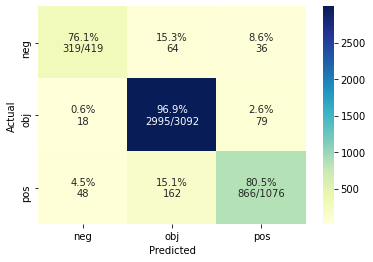

In [ ]:
# Evaluate model
score, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
    
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model.predict(X_val)

print(confusion_matrix(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val.argmax(axis=1),predictions.argmax(axis=1), target_names=int_category.values()))  
print(accuracy_score(y_val.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val.argmax(axis=1),  predictions.argmax(axis=1), labels=int_category.values())

5/5 [==============================] - 0s 41ms/step - loss: 0.2393 - accuracy: 0.9126
Score: 0.2393
Accuracy: 0.9126
[[ 358   32   29]
 [  47 2914  131]
 [  48  114  914]]
              precision    recall  f1-score   support

         neg       0.79      0.85      0.82       419
         obj       0.95      0.94      0.95      3092
         pos       0.85      0.85      0.85      1076

    accuracy                           0.91      4587
   macro avg       0.86      0.88      0.87      4587
weighted avg       0.91      0.91      0.91      4587

0.9125790276869413


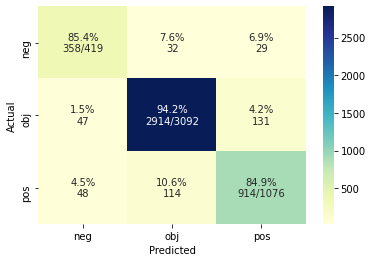

In [ ]:
# Evaluate model
score, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
    
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model.predict(X_val)

print(confusion_matrix(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val.argmax(axis=1),predictions.argmax(axis=1), target_names=int_category.values()))  
print(accuracy_score(y_val.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val.argmax(axis=1),  predictions.argmax(axis=1), labels=int_category.values())

##### Train on negative

In [ ]:
neg = revs.query("polarity=='neg'").dropna()
s = neg.cleaned.values[29]
# print(s)
for i, s in neg.cleaned.iteritems():
    if int_category[model.predict(wtv_vect.instance_transform([s])).argmax()] != 'neg':
        print("{}. {}".format(i, s))

30. nan
139. مستعجله طول وقتها تقول بسرعه بسرعه وراكي بيشن انا دافعه عشان تشوفي حالتي بشكل دقيق بالاخير مشي حالك
398. خلاف التوقع علما انا الحجز باسم دكتور ومن قام بالكشف دكتور اخر مع الاسف
531. siaa
536. في تامين
701. يا رب بكرا نصحي و نلاقيك يا دكتور حسن موضحلنا كلامك علشان نفهم بلاش البوستات دي كفاية حط بقا حاجة نفهمها عن تقدم الطب اشرحلنا عن كل حالة يا ريت
1019. انتظارمدةطويلةلعمل الاشعة
1624. كشفيه ١٥٠ اش فيه
1628. ركزوا يا جماعة تدخل اي عملية بسعر وتطلع السعر دبل الاطباء مطلوب منهم دخل معين يعني بيقولك تحاليل فحوصات واشعة لو عندك زكام والمحاسب المصري الكلب بيقولك عندك 10 ايام او نرفع دعوي قضائية عليك وتوقع علي اوراق توديك وري الشمس الحمل نصب يقولك 11 وتطلع 15 او 18 قدام عيني عمليات الباطنية عمليات الكسور مستشفي حرامية الله لايوفقهم انتبهو
1642. كويسة هي المشكلة في الاسعار بس
1708. طيب الحمدالله اني شفت التعليقات قبل لا اتهور واروح حسيت من اسلوب موظفة الهاتف
1843. allah is my suffice and the best deputy
2096. intrigued care center in the world
2394. انا دخلت الطوارئ في مستشفي الان

In [ ]:
neg.loc[139,'cleaned']
to_categorical(category_int['neg'], num_classes=3)
model.train_on_batch(wtv_vect.instance_transform([neg.loc[139, 'cleaned']]), to_categorical(category_int['neg'], num_classes=3).reshape(1, -1))

[0.2396833300590515, 0.9123800992965698]

In [ ]:
# n_X = wtv_vect.instance_transform(neg.cleaned.astype(str))
# n_y = to_categorical(labelencoder.transform(neg.polarity.astype(str)), num_classes=cats)
# model.train_on_batch()
wtv_vect.instance_transform([neg.loc[139, 'cleaned']]).shape
to_categorical(category_int['neg'], num_classes=3).reshape(1, -1).shape

(1, 50, 300)

##### Save / restore FCNN model

In [ ]:
# model.save_weights(os.path.join('models','FCNN_w2v_model_weights_2.hdf5'))
# with open(os.path.join('models','FCNN_w2v_model_architecture_2.json'), 'w') as f:
#     f.write(model.to_json())
if flag_lstm:
    if flag_tfidf:
        save_keras_model(model, parameters ,model_name='FCNN_tfidf_lstm_model', path='../Evaluation/models/')
    else:
        save_keras_model(model, parameters ,model_name='FCNN_w2v_lstm_model', path='./models/')#using new w2v
else:
    if flag_tfidf:
        save_keras_model(model, parameters ,model_name='FCNN_tfidf_model', path='../Evaluation/models/')
    else:
        save_keras_model(model, parameters ,model_name='FCNN_w2v_model', path='../Evaluation/models/')

In [ ]:
# path = 'models'
# with open(os.path.join(path,'FCNN_w2v_model_architecture_2.json'), 'r') as f:
#     loaded_model = model_from_json(f.read())
# loaded_model.load_weights(os.path.join(path,'FCNN_w2v_model_weights_2.hdf5'))

# if flag_tfidf:
#     model, parameters = load_keras_model('FCNN_tfidf_model')
# else:
#     model, parameters = load_keras_model('FCNN_w2v_model')
model, parameters = load_keras_model(model_name='FCNN_w2v_lstm_model', path='./models/')
dense_layers, opt_name, batch_size, lr, decay, int_category = parameters['param']

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 50, 300)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 512)           1140736   
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 1,272,835
Trainable params: 1,272,835
Non-trainable params: 0
___________________________________________________

5/5 [==============================] - 0s 38ms/step - loss: 10.9897 - accuracy: 0.0994
Score: 10.9897
Accuracy: 0.0994
[[ 341    0   78]
 [3072    0   20]
 [ 961    0  115]]
              precision    recall  f1-score   support

         neg       0.08      0.81      0.14       419
         obj       0.00      0.00      0.00      3092
         pos       0.54      0.11      0.18      1076

    accuracy                           0.10      4587
   macro avg       0.21      0.31      0.11      4587
weighted avg       0.13      0.10      0.05      4587

0.09941137998691955


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


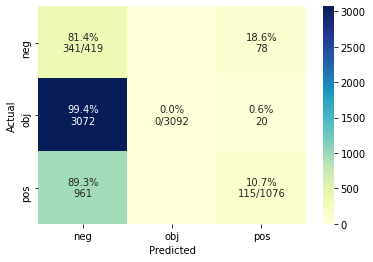

In [ ]:
# Evaluate model
if opt_name=='Adamax':
    opt = Adamax(lr=lr, decay=decay)
else:
    opt = Adam(lr=lr, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.evaluate(X_train, y_train, batch_size=batch_size)
score, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
    
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model.predict(X_val)

print(confusion_matrix(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val.argmax(axis=1),predictions.argmax(axis=1), target_names=int_category.values()))  
print(accuracy_score(y_val.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val.argmax(axis=1),  predictions.argmax(axis=1), labels=int_category.values())

##### Feedback learning

In [ ]:
def feedback_learing(text,correct_pred):
    assert isinstance(text, str) and correct_pred in category_int.keys()
    X = remove_longation(text)
    X = wtv_vect.instance_transform([X])
    Y = category_int[correct_pred]
    Y = to_categorical(Y, num_classes=cats).reshape(-1, cats)
    print(model.train_on_batch(X,Y))
    # model.save('model.h5')


In [ ]:
def predict_sentiment(text):
    assert isinstance(text, str)
    X = remove_longation(text)
    X = wtv_vect.instance_transform([X])
    pred = model.predict(X, verbose=True)
    # pred=pred.reshape(pred.shape[0],)[0]
    return int_category[pred.argmax()],pred
 

In [ ]:
if __name__ == "__main__":
    while(True):
        user_messege=input("Hi, please enter a message to test model prediction: ")
        if user_messege == 'STOPNOW223':
            break
        pred,score=predict_sentiment(user_messege)
        print(pred,'\n',"score: ",score)
        feedback=input("Was it the correct prediction? [Y/N] ")
        if(feedback.lower()=='n'):
            correct = input("Please insert the correct label from {}: ".format(list(category_int.keys())))
            while correct not in category_int.keys(): correct = input("Wrong value\nPlease insert the correct label from: {}".format(list(category_int.keys())))
            feedback_learing(user_messege, correct)

Hi, please enter a message to test model prediction: ممكن اعرف المواعيد
1/1 [==============================] - 0s 14ms/step
neg 
 score:  [[0.9928109  0.00343288 0.00375619]]
Was it the correct prediction? [Y/N] N
Please insert the correct label from ['neg', 'obj', 'pos']: obj
[5.309720516204834, 0.28814297914505005]
Hi, please enter a message to test model prediction: STOPNOW223


### IV. Testing our data

#### Combine samples

In [ ]:
df_fb = pd.read_csv("../Evaluation/data/FB_comments_combined.csv").dropna(subset=['cleaned'])

print(df_fb.columns)
df_fb_1 = pd.read_csv("../Evaluation/data/Facebook_EG.csv", index_col=0)
print(df_fb_1.columns)
df_fb_2 = pd.read_csv("../Evaluation/data/Facebook_KSA.csv", index_col=0)
print(df_fb_2.columns)
df_fb_3 = pd.read_csv("../Evaluation/data/Facebook_Removed_KSA.csv", index_col=0)
print(df_fb_3.columns)
df_FB = pd.concat([df_fb_1, df_fb_2, df_fb_3])

Index(['message', 'created_time', 'id', 'comment_created_time',
       'comment_message', 'comment_id', 'post_id', 'page_name', 'platform',
       'cleaned', 'predicted', 'tags', 'inquiry', 'ALL_Categories', 'langs'],
      dtype='object')
Index(['created_time', 'from', 'id', 'post_id', 'file_name', 'message',
       'cleaned', 'langs', 'predicted', 'tags', 'inquiry', 'ALL_Categories'],
      dtype='object')
Index(['created_time', 'from', 'id', 'post_id', 'file_name', 'message',
       'cleaned', 'langs', 'predicted', 'tags', 'inquiry', 'ALL_Categories'],
      dtype='object')
Index(['created_time', 'from', 'id', 'post_id', 'file_name', 'message',
       'cleaned', 'langs', 'predicted', 'tags', 'inquiry', 'ALL_Categories'],
      dtype='object')


In [ ]:
print(df_fb.isna().sum(), df_FB.isna().sum())

message                   699
created_time                0
id                          0
comment_created_time        0
comment_message             0
comment_id                  0
post_id                     0
page_name                   0
platform                    0
cleaned                     0
predicted                   0
tags                    13886
inquiry                     0
ALL_Categories              0
langs                       0
dtype: int64 created_time          0
from              41192
id                    0
post_id               0
file_name             0
message               0
cleaned               0
langs                 0
predicted             0
tags              26379
inquiry               0
ALL_Categories        0
dtype: int64


In [ ]:
df_facebook = pd.concat([df_fb.drop('message', axis=1).rename(columns={"comment_message": "message"}), df_FB]).dropna(axis=1).drop_duplicates()

In [ ]:
df_facebook.to_csv("../new_datasets/all_facebook.csv", index=False)

In [ ]:
df_test = pd.read_csv("../new_datasets/all_facebook.csv")

#### prepare vectorizers

**Note:**
load the prediction model first

In [ ]:
# flag_tfidf = False
# flag_lstm=False
if flag_tfidf:
    with open(os.path.join('../Sentiment_task/models', 'tfidf_features.pkl'), 'rb') as fid:
        vocabulary = pickle.load(fid)
        idfs = pickle.load(fid)
    tfidf2 = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=(1,2), max_features=5000, vocabulary=vocabulary )#, max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
    tfidf2.idf_=idfs
else:
    VER = 2
    word2vec = KeyedVectors.load_word2vec_format('../Sentiment_task/models/w2v_checkpoints_V'+str(VER)+'/w2v_model.bin', binary=True)
    # word2vec = Word2Vec.load('../Sentiment_task/models/w2v_checkpoints/w2v_model_epoch15.gz').wv ## very bad results
    wtv_vect = WordVecVectorizer(word2vec)
    # if lstm: vect = WordVecVectorizer_2(word2vec)

In [ ]:
FCNN = True
t = time()
if flag_tfidf:
    X_test = tfidf.transform(df_test["msg_stem_stop_words"]).toarray()
else:
    if flag_lstm:
        X_test = wtv_vect.instance_tranform(df_test.cleaned.astype(str))
    else: X_test = wtv_vect.transform(df_test.cleaned.astype(str))
print(X_test.shape)
if FCNN:
    pred = model.predict(X_test).argmax(axis=1)
    pred = list(map(lambda x: int_category[x], pred))
else:
    pred = clf.predict(X_test)

(13369, 50, 300)


In [ ]:
df_test['predicted'] = pred
print(df_test['predicted'].describe())
print(df_test.predicted.value_counts())
# df_test.drop(columns=["langs", "msg_stem", "msg_stem_stop_words"], inplace=True)
df_test.sample(5, random_state=10)


count     13369
unique        3
top         obj
freq      11312
Name: predicted, dtype: object
obj    11312
pos     1953
neg      104
Name: predicted, dtype: int64


,file_name,message,cleaned,msg_lemmed,msg_stem,msg_stem_stop_words,predicted
15949,AndalusiaDC Page comments with post_id_col.xlsx,هى الزارعه بتتعمل فى يوم,هي الزارعه بتتعمل في يوم,هي زارع تتعمل في وم,هي زرع عمل في وم,زرع عمل وم,obj
8378,AndalusiaHjH Page comments with post_id_col.xlsx,السلام عليكم\nهل يوجد دكتور عيون,السلام عليكم هل يوجد دكتور عيون,سلام على هل وجد دكتور عي,سلم علي هل وجد دكتور عي,سلم وجد دكتور عي,obj
7000,AndalusiaHjH Page comments with post_id_col.xlsx,هذا أقل شيء ممكن يتقدم لمثل هؤلاء المخلصين يعلم الله اني فخور جدا بهم كوني أري نظاما وأمانا ارجو...,هذا اقل شيء ممكن يتقدم لمثل هؤلاء المخلصين يعلم الله اني فخور جدا بهم كوني اري نظاما وامانا ارجو...,هذا قل شيء مم تقدم مثل هؤلاء مخلص علم له ني خور جد هم ون ري ظاما ما رجو ان تم له عمت على,هذا قل شيء مم قدم مثل هؤلاء خلص علم له ني خور جد هم ون ري ظما ما رجو ان تم له عمت علي,قل شيء مم قدم مثل خلص علم ني خور جد ون ري ظما ما رجو تم عمت,pos
279,Andalusia Polyclinics Page comments with post_id_col.xlsx,ماشاء الله ربنا يوفقك ياارب فعلا احسن دكتوره,ماشاء الله ربنا يوفقك يا رب فعلا احسن دكتوره,ماشاء له رب وفق يا رب عل حس دكتور,اشء له رب وفق يا رب عل حس دكتور,اشء رب وفق رب حس دكتور,pos
471,AndalusiaCKW Page comments with post_id_col.xlsx,كلام جميل جدا,كلام جميل جدا,لام جميل جد,لام جمل جد,لام جمل جد,pos


#### Categorize by dictionary

In [ ]:
df_test["tags"] = ""
df_test["inquiry"] = 0
for idx in df_test.index:
    # Adding "tags" and "inquiry" columns
    sentence = str(df_test.msg_stem.loc[idx]).split() + str(df_test.msg_lemmed.loc[idx]).split()  # TODO
    if any(e in sentence for e in ['ماد' ,'دفع' ,'مبلغ','مبالغ', 'ثمن','تمن', 'كام' ,'كم', 'بكم', 'كلف', 'سعر', 'جنيه', 'ريال', 'خصم', 'غال', 'فلس', 'مجان','مجا', 'رخص']): df_test.at[idx, 'tags'] += 'price-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['خدم', 'دري', 'مدير', 'ادار', 'نتظار', 'نتظر', 'شخيص' ,'طويل', 'استقبال' ,'معامل']): df_test.at[idx, 'tags'] += 'service-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['موقف', 'مواقف', 'مصعد', 'دور', 'مبن', 'زدحام', 'زحم']): df_test.at[idx, 'tags'] += 'structure-'; df_test.at[idx, 'inquiry'] = 1
    if 'تامين' in df_test.cleaned.loc[idx]: df_test.at[idx, 'tags'] += 'insurance-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['ساع', 'مت', 'معاد', 'ميعاد', 'موعد', 'مواعيد', 'وقت' ,'تخر']): df_test.at[idx, 'tags'] += 'datetime-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['موجود', 'عنو', 'روح', 'مك', 'مكان', 'فرع', 'فين', 'موقع', 'وين']): df_test.at[idx, 'tags'] += 'place-'; df_test.at[idx, 'inquiry'] = 1
    if any(e in sentence for e in ['عند' ,'عا' ,'علاج' ,'كيف', 'علم', 'رجاء', 'محتاج', 'عايز', 'عاوز', 'تفاصيل', 'رجو', 'عرف', 'هل', 'ايش', 'ايه', 'ازي', 'معلش', 'سمح', 'مين', 'ياري', 'مكن', 'ليه']): df_test.at[idx, 'inquiry'] = 1 # general
               
# df_test.tags[msg_words.apply(lambda x: any(e in x.split() for e in ['كم', 'بكم', 'كلف', 'سعر']))]

In [ ]:
df_test.sample(5, random_state=10)

,file_name,message,cleaned,msg_lemmed,msg_stem,msg_stem_stop_words,predicted,tags,inquiry
15949,AndalusiaDC Page comments with post_id_col.xlsx,هى الزارعه بتتعمل فى يوم,هي الزارعه بتتعمل في يوم,هي زارع تتعمل في وم,هي زرع عمل في وم,زرع عمل وم,obj,,0
8378,AndalusiaHjH Page comments with post_id_col.xlsx,السلام عليكم\nهل يوجد دكتور عيون,السلام عليكم هل يوجد دكتور عيون,سلام على هل وجد دكتور عي,سلم علي هل وجد دكتور عي,سلم وجد دكتور عي,obj,,1
7000,AndalusiaHjH Page comments with post_id_col.xlsx,هذا أقل شيء ممكن يتقدم لمثل هؤلاء المخلصين يعلم الله اني فخور جدا بهم كوني أري نظاما وأمانا ارجو...,هذا اقل شيء ممكن يتقدم لمثل هؤلاء المخلصين يعلم الله اني فخور جدا بهم كوني اري نظاما وامانا ارجو...,هذا قل شيء مم تقدم مثل هؤلاء مخلص علم له ني خور جد هم ون ري ظاما ما رجو ان تم له عمت على,هذا قل شيء مم قدم مثل هؤلاء خلص علم له ني خور جد هم ون ري ظما ما رجو ان تم له عمت علي,قل شيء مم قدم مثل خلص علم ني خور جد ون ري ظما ما رجو تم عمت,pos,,1
279,Andalusia Polyclinics Page comments with post_id_col.xlsx,ماشاء الله ربنا يوفقك ياارب فعلا احسن دكتوره,ماشاء الله ربنا يوفقك يا رب فعلا احسن دكتوره,ماشاء له رب وفق يا رب عل حس دكتور,اشء له رب وفق يا رب عل حس دكتور,اشء رب وفق رب حس دكتور,pos,,0
471,AndalusiaCKW Page comments with post_id_col.xlsx,كلام جميل جدا,كلام جميل جدا,لام جميل جد,لام جمل جد,لام جمل جد,pos,,0


In [ ]:
df_test["ALL_Categories"] = ''
for idx in df_test.index:
    if df_test.predicted[idx] in ['pos', 'neg']: #if df_test.at[idx, 'inquiry']==0:
        df_test.at[idx, 'ALL_Categories'] = 'Positive-Feedback' if df_test.predicted[idx]=='pos' else 'Negative-Feedback'# if df_test.predicted[idx]=='neg' else 'Other'
    elif df_test.at[idx, 'inquiry']==1:
        if df_test.at[idx, 'tags']=='price-': df_test.at[idx, 'ALL_Categories'] = 'Price-Inquiry'
        elif df_test.at[idx, 'tags']=='place-': df_test.at[idx, 'ALL_Categories'] = 'Place-Inquiry'
        elif df_test.at[idx, 'tags']=='datetime-': df_test.at[idx, 'ALL_Categories'] = 'Appointments-Inquiry'
        elif df_test.at[idx, 'tags']=='' : df_test.at[idx, 'ALL_Categories'] = 'General-Inquiry / Consultation' #np.isnan(df_test.at[idx, 'tags'])
        else: df_test.at[idx, 'ALL_Categories'] = 'Mixed-Inquiries'
    else:
        df_test.at[idx, 'ALL_Categories'] = 'General Conversation'

In [ ]:
df_test.query("predicted=='neg'")

,file_name,message,cleaned,msg_lemmed,msg_stem,msg_stem_stop_words,predicted,tags,inquiry,ALL_Categories
10,Andalusia Polyclinics Page comments with post_id_col.xlsx,زرتكم في العيادات من حوالي ثلاثة أشهر، للأسف الطبيب أخبرني بعدم إمكانية الزراعة.,زرتكم في العيادات من حوالي ثلاثة اشهر للاسف الطبيب اخبرني بعدم امكانية الزراعة,زر في عياد من حوالى ثلاث شهر سف طبيب خبر عدم مكان زراع,زر في عيد من حلي ثلث شهر سف طبب خبر عدم كان زرع,زر عيد حلي ثلث شهر سف طبب خبر عدم كان زرع,neg,place-,1,Negative-Feedback
88,Andalusia Polyclinics Page comments with post_id_col.xlsx,والله الواحد يخاف يخسر فلوس ومايستفيد لاني جربت الأجهزه ومااستفدت خسرت مبالغ واصبت بالاحباط خ...,والله الواحد يخاف يخسر فلوس ومايستفيد لاني جربت الاجهزه وماستفدت خسرت مبالغ واصبت بالاحباط خساره...,له حد خاف خسر وس ومايستفيد ان جرب جهز ماستفدت خسر مبالغ اصب حباط خسار قت مبالغ خر شي حباط ذا ضمن...,له حد خاف خسر وس ومايستفيد ان جرب جهز ماستفد خسر بلغ اصب حبط خسر قت بلغ خر شي حبط ذا ضمنو كيد جه...,حد خاف خسر وس ومايستفيد جرب جهز ماستفد خسر بلغ اصب حبط خسر قت بلغ خر شي حبط ضمنو كيد جهز كيرف سع...,neg,price-,1,Negative-Feedback
185,Andalusia Polyclinics Page comments with post_id_col.xlsx,المشكلة الخدمات والمواعيد والاستقبال سيء,المشكلة الخدمات والمواعيد والاستقبال سيء,مشكل خدم مواعيد استقبال سيء,شكل خدم مواعيد قبل سيء,شكل خدم مواعيد قبل سيء,neg,service-datetime-,1,Negative-Feedback
578,AndalusiaCKW Page comments with post_id_col.xlsx,ما حدا بيرد.. اغلب العالم لابستها و بتستعملها بطريقه غلط واكتر من مره بتستعملها.. و اذا مش لابسه...,ما حدا بيرد اغلب العالم لابستها و بتستعملها بطريقه غلط واكتر من مره بتستعملها و اذا ما لابسه كما...,ما حد يرد غلب عالم ابس و تستعمل طريق غلط كتر من مر تستعمل و ذا ما ابس مام ينظرول نك مهمل و ما عا...,ما حد يرد غلب علم ابس و عمل طرق غلط كتر من مر عمل و ذا ما ابس مام ظرل نك همل و ما عرف حفظ عصح,ما حد يرد غلب علم ابس عمل طرق غلط كتر مر عمل ما ابس مام ظرل نك همل ما عرف حفظ عصح,neg,,1,Negative-Feedback
584,AndalusiaCKW Page comments with post_id_col.xlsx,للأسف الأهل بيبقو فرحانين بتنمر اطفالهم على الاطفال الآخرين وما في اي محاولة للردع وبيعتبروها قو...,للاسف الاهل بيبقو فرحانين بتنمر اطفالهم علي الاطفال الاخرين وما في اي محاولة للردع وبيعتبروها قو...,سف هل يبقو رحان تنمر طفال على طفال خري ما في اي محاول ردع يعتبرو قو شخص غير مبال مشاعر طفل خر,سف هل بقو رحن نمر طفل علي طفل خري ما في اي حال ردع عتبرو قو شخص غير بال شعر طفل خر,سف بقو رحن نمر طفل طفل خري ما حال ردع عتبرو قو شخص بال شعر طفل خر,neg,,1,Negative-Feedback
...,...,...,...,...,...,...,...,...,...,...
17661,AndalusiaDC Page comments with post_id_col.xlsx,عدم التمسك بالوظيفه,عدم التمسك بالوظيفه,عدم مس ظيف,عدم مس ظيف,عدم مس ظيف,neg,,0,Negative-Feedback
17734,AndalusiaDC Page comments with post_id_col.xlsx,صراحه احنا زعلانين من المركز لانه للاسف في اطباء ما يراعو الله,صراحه احنا زعلانين من المركز لانه للاسف في اطباء ما يراعو الله,صراح حن زعلان من مركز ان سف في اطباء ما راعو له,صرح حن زعل من ركز ان سف في طبء ما رعو له,صرح حن زعل ركز سف طبء ما رعو,neg,,0,Negative-Feedback
17736,AndalusiaDC Page comments with post_id_col.xlsx,يكون ممكن يساعدوك بالتامين حقق ولكن للاسف يقولوا هدا مافي تامين علشان ندفع كاش ونروح مركز ثاني و...,يكون ممكن يساعدوك بالتامين حقق ولكن للاسف يقولوا هدا مافي تامين علشان ندفع كاش ونروح مركز ثاني و...,كو مم ساعد تام حقق لكن سف قول هد ماف تام علش دفع اش روح مركز ثان سو على تام,كو مم سعد تام حقق لكن سف قول هد ماف تام علش دفع اش روح ركز ثان سو علي تام,كو مم سعد تام حقق سف قول هد ماف تام علش دفع اش روح ركز ثان سو تام,neg,price-insurance-place-,1,Negative-Feedback
17770,AndalusiaDC Page comments with post_id_col.xlsx,كلهم اجانب وين السعوديين الظاهر ما فيه راتبين يعني ما فيه ابتسامه :),كلهم اجانب وين السعودين الظاهر ما فيه راتبين يعني ما فيه ابتسامه,كل جانب ين سعود ظاهر ما في راتب عني ما في بتسام,كل جنب ين سعد ظهر ما في رتب عني ما في تسم,جنب ين سعد ظهر ما رتب عني ما تسم,neg,,0,Negative-Feedback


In [ ]:
# assert (df_test.cleaned==df_ksa.query("langs=='ar'").cleaned).all()
# df_test["Clusters"] = df_ksa.query("langs=='ar'").clusters
# df_test.sample(10)

#### Save predicted data

In [ ]:
if flag_tfidf:
    if FCNN:
        df_test.drop(columns=["msg_stem", "msg_stem_stop_words", "msg_lemmed"]).to_csv("created_data/arabic_pred_dl_tfidf.csv", index=False)
    else:
        df_test.drop(columns=["msg_stem", "msg_stem_stop_words", "msg_lemmed"]).to_csv("created_data/arabic_pred_tfidf.csv", index=False)
else:
    if FCNN:
        df_test.drop(columns=["msg_stem", "msg_stem_stop_words", "msg_lemmed"]).to_csv("created_data/arabic_pred_dl_wv.csv", index=False)
    else:
        df_test.drop(columns=["msg_stem", "msg_stem_stop_words", "msg_lemmed"]).to_csv("created_data/arabic_pred_wv.csv", index=False)

### V. Statistics

In [ ]:
df_test['predicted'].value_counts()

obj    11156
pos     2038
neg      175
Name: predicted, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


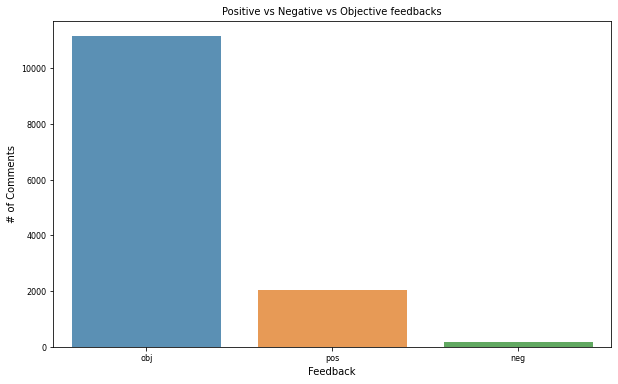

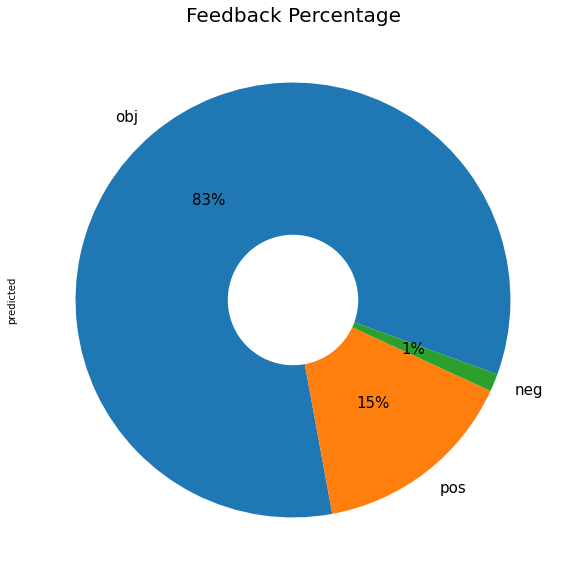

In [ ]:
x_rating = df_test['predicted'].value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Positive vs Negative vs Objective feedbacks", fontsize=10)
plt.ylabel('# of Comments', fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel('Feedback', fontsize=10)
plt.xticks(fontsize=8)
# In[]
plt.figure(figsize=(30,10))
plt.title('Feedback Percentage', fontsize=20)
df_test['predicted'].value_counts().plot(kind='pie', labels=x_rating.index,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})


In [ ]:
df_test.inquiry.value_counts()

1    7395
0    5974
Name: inquiry, dtype: int64

In [ ]:
df_test.query("tags=='price-'").shape[0]

2198

In [ ]:
# df_test.query("inquiry==1 and tags==''").shape
# df_test.where(df_test.query('inquiry == 1') and df_test["tags"].isna())
df_test[df_test.apply(lambda x: x.inquiry==1 and len(str(x.tags).split('-')) > 2 , axis=1)].shape[0]

890

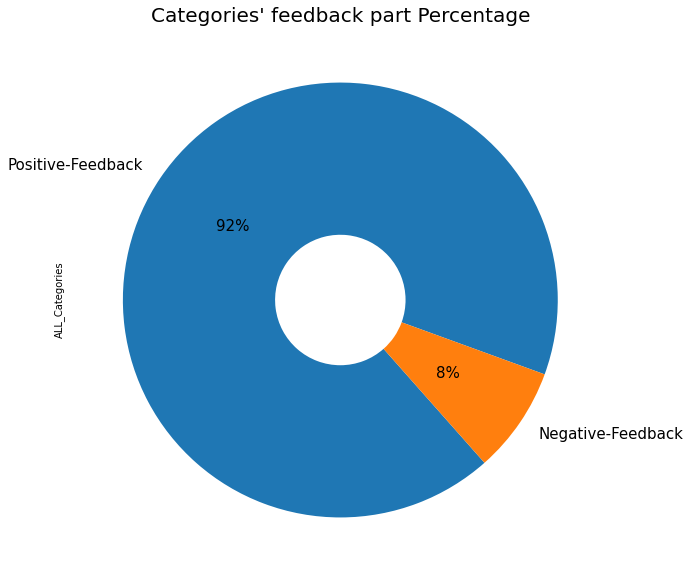

In [ ]:
# feedback = pd.Series({'Positive': df_test.query("predicted=='pos' and inquiry==0").shape[0], 'Negative': df_test.query("predicted=='neg' and inquiry==0").shape[0]})
feedback = df_test.query('ALL_Categories=="Positive-Feedback" or ALL_Categories=="Negative-Feedback"').ALL_Categories.value_counts()
plt.figure(figsize=(30,10))
plt.title('Categories\' feedback part Percentage', fontsize=20)
feedback.plot(kind='pie', labels=feedback.index,
              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
              textprops={'fontsize': 15})


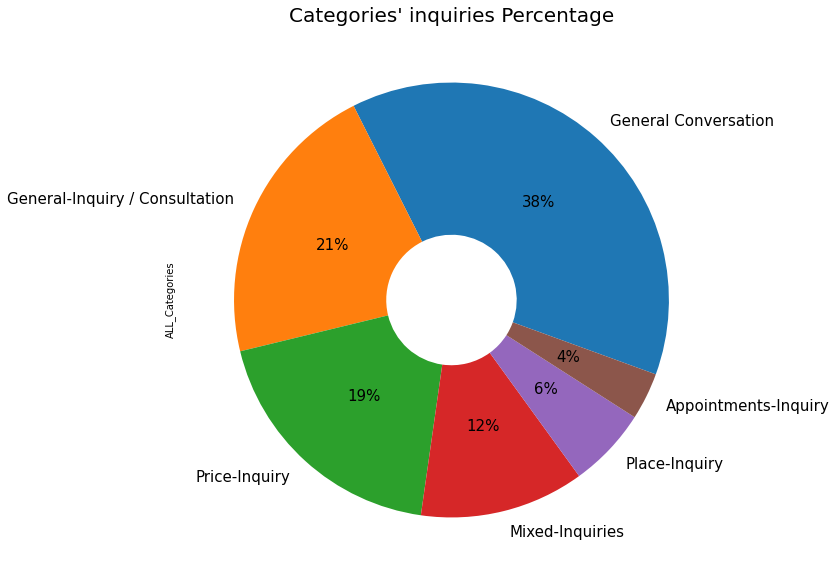

In [ ]:
FB = ["Positive-Feedback", "Negative-Feedback"]
# inquiries = pd.Series({'price_inquiry': df_test.query("tags=='price-'").shape[0], 'place_inquiry': df_test.query("tags=='place-'").shape[0], 'datetime_inquiry': df_test.query("tags=='datetime-'").shape[0], 'mixed_inquiry': df_test[df_test.apply(lambda x: x.inquiry==1 and len(str(x.tags).split('-')) > 2 , axis=1)].shape[0], 'general_inquiry': df_test.query("inquiry==1 and tags==''").shape[0]})
inquiries = df_test.query('ALL_Categories not in @FB').ALL_Categories.value_counts()
plt.figure(figsize=(30,10))
plt.title('Categories\' inquiries Percentage', fontsize=20)
inquiries.plot(kind='pie', labels=inquiries.index,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

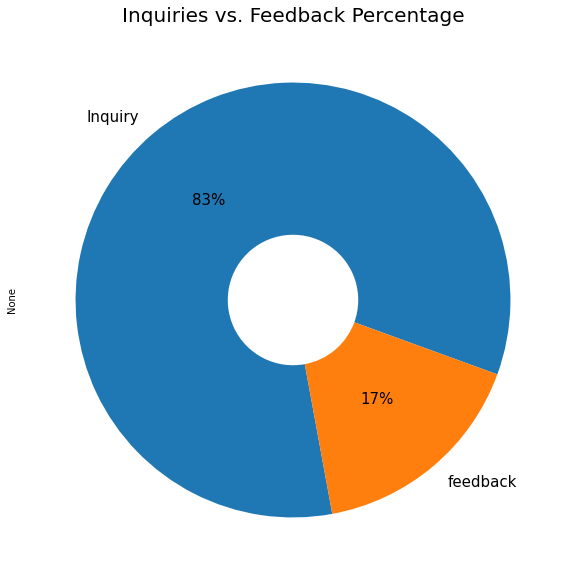

In [ ]:
inq_fb = pd.Series({'Inquiry': df_test.query('ALL_Categories not in @FB').shape[0], 'feedback':  df_test.query('ALL_Categories in @FB').shape[0]})
plt.figure(figsize=(30,10))
plt.title('Inquiries vs. Feedback Percentage', fontsize=20)
inq_fb.plot(kind='pie', labels=inq_fb.index,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

**Full percentage**

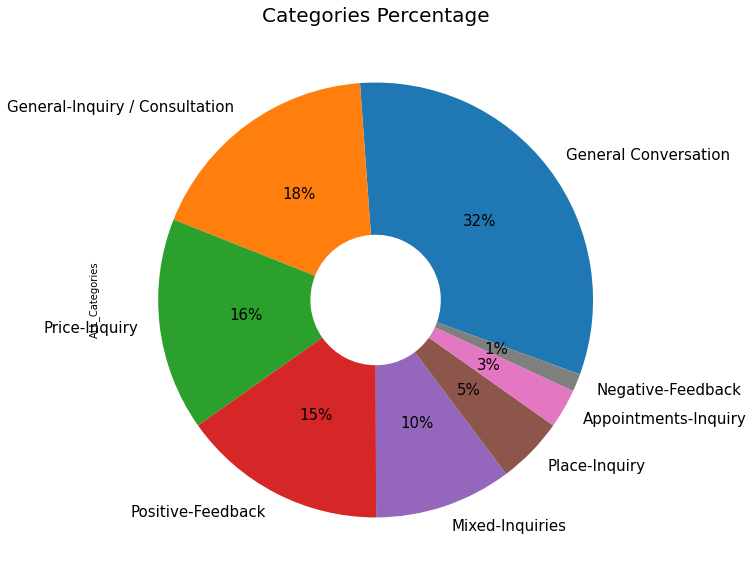

In [ ]:
stats = df_test.ALL_Categories.value_counts()
plt.figure(figsize=(30,10))
plt.title('Categories Percentage', fontsize=20)
stats.plot(kind='pie', labels=stats.index,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})


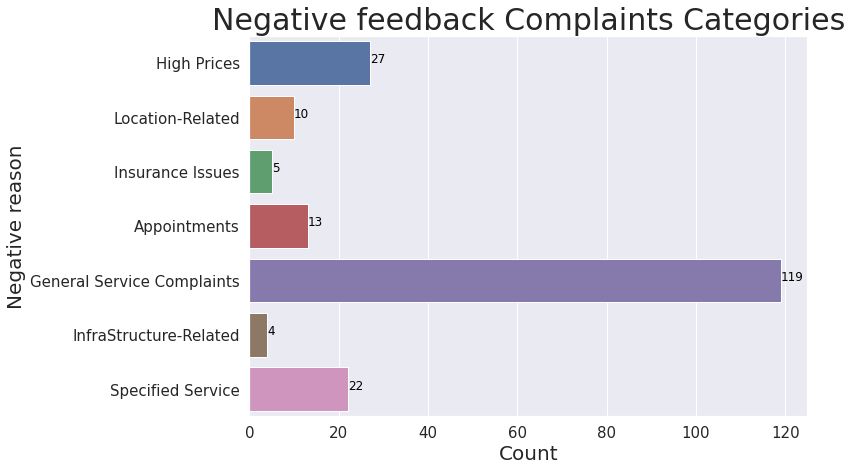

In [ ]:
NEG = df_test.query("predicted=='neg'")
negative_reason = NEG.tags.str.rstrip('-').str.split('-').explode().replace({'': 'General Service Complaints',
                                                                             'price': 'High Prices',
                                                                             'service': 'Specified Service',
                                                                             'datetime': 'Appointments',
                                                                             'place': 'Location-Related',
                                                                             'structure': 'InfraStructure-Related',
                                                                             'insurance': 'Insurance Issues'
                                                                             })

N = negative_reason.value_counts(sort=False)
N = pd.DataFrame({'Negative reason': N.index, 'Count':  N.values})
plt.figure(figsize=(10,7))
# plt.title("Negative feedback Categorization")
sns.set_theme(style="darkgrid")
ax = sns.barplot(y='Negative reason', x='Count', data=N)
ax.axes.set_title("Negative feedback Complaints Categories",fontsize=30)
ax.set_xlabel('Count',fontsize=20)
ax.set_ylabel('Negative reason',fontsize=20)
ax.tick_params(labelsize=15)
for index, row in N.iterrows():
    ax.text(row.Count, row.name, row.Count, color='black', ha="left")
# N.plot(kind='bar', x='Negative reason', y='Count')
# N

## Evaluation function

Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.
Adding dictionaries ...  Done.
Visualizing ...
/content/gdrive/.shortcut-targets-by-id/1TalpU3R9NJvBcFbmrx8aDBjC3JAS8Srl/Andalusia/Sentiment_KSA


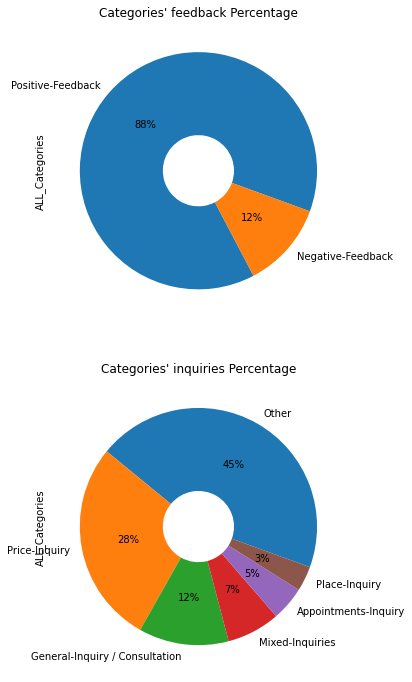

In [ ]:
from utilities import * 
from gensim.models import Word2Vec

class Evaluate(object):
    def __init__(self, data, text_column='message'):
        """Construct the Evaluation class.

        Keyword arguments:
        data -- a Pandas DataFrame containing the data samples to be processed and evaluated (must be of the type -> 'pandas.core.frame.DataFrame')
        text_column -- a string represents the name of the target column that contains the text data  (default 'message')
        """

        if not isinstance(data, pd.core.frame.DataFrame): raise TypeError("data must be a \"pandas dataframe\"")
        if not text_column in data.columns: raise ValueError("You didn't specify the correct column for the text data in the input dataframe")

        self.data = data
        self.message = self.data[text_column].astype(str)
        self.model_parameters = None
        self.predictions = None

    def get_data(self):
        """returns the data DF"""

        return self.data

    def clean(self, input=None, add_to_df=False, pipelined=False):
        """apply text cleaning steps to the message column
        
        Keyword arguments:
        input -- the input series to be processed (default None)
        **Note** - if the value isn't None, it's expected to be used in a pipeline. 
        add_to_df -- a boolean value; if true, it adds the result as a seprate column to the dataframe (default False)
        piplined -- a boolean value; if true, it overwrite self.message with the new transformation for a pipeline (default False) 
        """

        if input is None:
            input = self.message
        cleaned = clean_df(input) # Function defined in utilities.py
        if add_to_df:
            self.data["cleaned"] = cleaned
        if pipelined:
            self.message = cleaned
        return cleaned

    def stem(self, input=None, add_to_df=False, pipelined=False):
        """apply stemming to the message column
        
        Keyword arguments:
        input -- the input series to be processed (default None)
        **Note** - if the value isn't None, it's expected to be used in a pipeline. 
        add_to_df -- a boolean value; if true, it adds the result as a seprate column to the dataframe (default False)
        piplined -- a boolean value; if true, it overwrite self.message with the new transformation for a pipeline (default False) 
        """

        if input is None:
            input = self.message
        stemmed = stem(input) # Function defined in utilities.py, clean text before stemmed
        if add_to_df:
            self.data["stemmed"] = stemmed
        if pipelined:
            self.message = stemmed
        return stemmed

    def lemmatize(self, input=None, add_to_df=False, pipelined=False):
        """apply lemmatization to the message column
        
        Keyword arguments:
        input -- the input series to be processed (default None)
        **Note** - if the value isn't None, it's expected to be used in a pipeline. 
        add_to_df -- a boolean value; if true, it adds the result as a seprate column to the dataframe (default False)
        piplined -- a boolean value; if true, it overwrite self.message with the new transformation for a pipeline (default False) 
        """
        #TODO: takes too much time 
        if input is None:
            input = self.message
        lemmatized = lemma(input) # Function defined in utilities.py, clean text before lemmatization
        if add_to_df:
            self.data["lemmatized"] = lemmatized
        if pipelined:
            self.message = lemmatized
        return lemmatized

    def remove_stopwords(self, input=None, add_to_df=False, pipelined=False, stopWords=None, split=False, progress_per=None):
        """remove stopwords from the message column
        
        Keyword arguments:
        input -- the input series to be processed (default None)
        **Note** - if the value isn't None, it's expected to be used in a pipeline. 
        add_to_df -- a boolean value; if true, it adds the result as a seprate column to the dataframe (default False)
        piplined -- a boolean value; if true, it overwrite self.message with the new transformation for a pipeline (default False) 
        """

        if input is None:
            input = self.message
        no_sw = remove_stopwords(input, stopWords, split, progress_per) # Function defined in utilities.py
        if add_to_df:
            self.data["without_stopwords"] = no_sw
        if pipelined:
            self.message = no_sw
        return no_sw

    def transform(self, vectorizer="w2v", vect_model=None):
        """vector transform message column for classification

        Keyword arguments:
        vectorizer -- a string value describes the vectorization method used for preparing the data. 
        it can only take either 'tfidf' -> tfidf vectorization, or 'w2v' -> word2vec vectorization (default 'w2v')
        vect_model -- optionally, an object of the vectorizing model can be given here to save loading time, it must be the same type specified in 'vectorized' (default None)
        """

        if vectorizer=='tfidf':

            # Loading vectorizing model
            print("Loading Tf-Idf model ...")
            if vect_model is None:
                with open(os.path.join('./models', 'tfidf_features.pkl'), 'rb') as fid:
                    vocabulary = pickle.load(fid)
                    idfs = pickle.load(fid)
                tfidf = TfidfVectorizer(tokenizer=tokenizer, lowercase= False, ngram_range=(1,2), max_features=5000, vocabulary=vocabulary )#, max_df=0.7, min_df=5)#, preprocessor=sents, stop_words=cachedStopWords)
                tfidf.idf_=idfs
            else:
                tfidf = vect_model

            # Transformation
            print("Transforming data ...", end=' ')
            X = self.stem()
            self.remove_stopwords(X)
            X = tfidf.transform(X)

        elif vectorizer=='w2v':

            # Loading vectorizing model
            print("Loading Word2Vec model ...")
            if vect_model is None:
                w2v_model = Word2Vec.load('./models/w2v_checkpoints/w2v_model_epoch15.gz')
                wtv_vect = WordVecVectorizer(w2v_model) # Class defined in utilities.py
            else:
                wtv_vect = vect_model

            # Transformation
            print("Transforming data ...", end=' ')
            X = self.clean()
            X = wtv_vect.transform(X)

        else:
            raise ValueError("vectorizer should only be either 'tfidf' or 'w2v', however you entered {}".format(vectorizer))
        print("Done.")

        return X

    def predict(self, input=None, model_name='FCNN_model'):
        """Evaluate the FCNN model and produce predictions

        Keyword arguments:
        input -- a numpy array represent the transformed data; it should be the output of self.transform in the shape (# of samples, features_dim) (default None). 
        model_name -- the name of the folder, which contains the model, the full path would be './models/model_name' (default 'FCNN_model)
        """

        # in case the input is not given
        if input is None:
            input = self.transform("w2v")
        # Loading the classification model
        print("Loading Classification model ... ")
        model, parameters = load_keras_model(model_name) # Function defined in utilities.py
        # Defining parameters
        self.model_parameters = parameters
        dense_layers, opt_name, batch_size, lr, decay, int_category = self.model_parameters['param']
        cats = len(int_category)
        input_shape = (input.shape[1], )
        if opt_name=='Adamax':
            opt = Adamax(lr=lr, decay=decay)
        else:
            opt = Adam(lr=lr, decay=decay)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        # Evaluating the model
        print("Evaluating the model ...", end=' ')
        predictions = model.predict(input).argmax(axis=1)
        predictions = list(map(lambda x: int_category[x], predictions))
        self.data['predicted'] = predictions
        self.predictions = predictions
        print("Done.")

        return predictions

    def add_dicts(self):
        """Categorize topics for the text data with respect to a dictionary"""

        # a pre-requisit
        if "predicted" not in self.data.columns:
            self.predict(model_name='FCNN_model')

        print("Adding dictionaries ... ", end=' ')
        
        self.data["tags"] = ""
        self.data["inquiry"] = 0
        self.data["ALL_Categories"] = ''

        stemmed = self.stem()
        # lemmed = self.lemmatize() #TODO: takes too much time 

        for idx in self.data.index:

            # Adding "tags" and "inquiry" columns
            sentence = stemmed.loc[idx].split() #+ lemmed.loc[idx].split() # TODO
            if any(e in sentence for e in ['كام' ,'كم', 'بكم', 'كلف', 'سعر']): self.data.at[idx, 'tags'] += 'price-'; self.data.at[idx, 'inquiry'] = 1
            if any(e in sentence for e in ['مواعيد', 'يعد', 'عاد']): self.data.at[idx, 'tags'] += 'datetime-'; self.data.at[idx, 'inquiry'] = 1
            if any(e in sentence for e in ['عنو', 'عنوان', 'اروح', 'مكان', 'فرع', 'وفى']): self.data.at[idx, 'tags'] += 'place-'; self.data.at[idx, 'inquiry'] = 1
            if any(e in sentence for e in ['رجاء', 'محتاج', 'عاوز', 'تفاصيل', 'ارجو', 'عرف', 'هل', 'ايه', 'ازاي', 'معلش', 'سمح', 'مان', 'ياريت', 'ممكن', 'ليه']): self.data.at[idx, 'inquiry'] = 1 # general
            
            # Adding "ALL_Categories" column
            if self.data.at[idx, 'inquiry']==0:
                self.data.at[idx, 'ALL_Categories'] = 'Positive-Feedback' if self.data.predicted[idx]=='pos' else 'Negative-Feedback' if self.data.predicted[idx]=='neg' else 'Other'
            else:
                if self.data.at[idx, 'tags']=='price-': self.data.at[idx, 'ALL_Categories'] = 'Price-Inquiry'
                elif self.data.at[idx, 'tags']=='place-': self.data.at[idx, 'ALL_Categories'] = 'Place-Inquiry'
                elif self.data.at[idx, 'tags']=='datetime-': self.data.at[idx, 'ALL_Categories'] = 'Appointments-Inquiry'
                elif self.data.at[idx, 'tags']=='' : self.data.at[idx, 'ALL_Categories'] = 'General-Inquiry / Consultation' #np.isnan(self.data.at[idx, 'tags'])
                else: self.data.at[idx, 'ALL_Categories'] = 'Mixed-Inquiries'
        
        print("Done.")

    def visualize(self):
        """Visualizing the final data; making tow pie plots for feedback data, inquiry data"""
        
        # a pre-requisit
        if "ALL_Categories" not in self.data.columns:
            self.add_dicts()
        
        print("Visualizing ...")
        feedback = self.data.query('ALL_Categories=="Positive-Feedback" or ALL_Categories=="Negative-Feedback"').ALL_Categories.value_counts()
        # plt.figure(figsize=(15,10))
        fig, ax = plt.subplots(2, figsize=(20, 12))
        ax[0].set_title('Categories\' feedback Percentage', fontsize=12)
        feedback.plot(kind='pie', labels=feedback.index,
                    wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                    textprops={'fontsize': 10}, ax=ax[0])
        
        inquiries = self.data.query('inquiry==1 or predicted=="obj"').ALL_Categories.value_counts()
        # plt.figure(figsize=(15,10))
        ax[1].set_title('Categories\' inquiries Percentage', fontsize=12)
        inquiries.plot(kind='pie', labels=inquiries.index,
                                    wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                                    textprops={'fontsize': 10}, ax=ax[1])


if __name__ == '__main__':
    os.chdir("../Evaluation/")
    df = pd.read_csv("./data/data.csv")
    
    eval = Evaluate(df)
    transformed = eval.transform(vectorizer="w2v")
    predictiones = eval.predict(input=transformed, model_name='FCNN_w2v_model')
    eval.add_dicts()
    eval.visualize()
    Final_data = eval.get_data()
    os.chdir(curDir)
    !pwd


In [ ]:
eval.get_data().sample(5, random_state=10)

,Unnamed: 0,Unnamed: 0.1,message,predicted,tags,inquiry,ALL_Categories
1462,1462,1664,المواعيد وسعر الكشف,obj,price-datetime-,1,Mixed-Inquiries
2783,2783,3145,فيه فرع بني سويف,obj,place-,1,Place-Inquiry
3231,3231,3669,الكشف لكام ةالحشو,obj,,0,Other
1198,1198,1340,جرين بيل,obj,,0,Other
372,372,415,بكم الجلسه,obj,price-,1,Price-Inquiry


In [ ]:
transformed.shape

(13752, 300)

In [ ]:
!ls -alh models/FCNN_w2v_model

total 583K
-rw------- 1 root root 2.3K Feb 14 15:41 FCNN_w2v_model_architecture.json
-rw------- 1 root root  299 Feb 14 15:41 FCNN_w2v_model_parameters.pkl
-rw------- 1 root root 580K Feb 14 15:41 FCNN_w2v_model_weights.hdf5


In [ ]:
# !pip freeze 
! pip install pipreqs
! pipreqs ../Evaluation/
# !ls
!cat ../Evaluation/requirements.txt

INFO: Successfully saved requirements file in ../Evaluation/requirements.txt
pandas==1.1.5
seaborn==0.11.1
Keras==2.4.3
gensim==3.6.0
nltk==3.2.5
numpy==1.19.5
matplotlib==3.2.2
pyarabic==0.6.10
scikit_learn==0.24.1
tashaphyne==0.3.4.1


In [ ]:
!cp ../Sentiment_task/models/tfidf_features.pkl ../Evaluation/models/

In [ ]:
!ls -lah ../Evaluation/models/

total 299K
drwx------ 2 root root 4.0K Feb 15 09:05 best_acc_FCNN
drwx------ 2 root root 4.0K Feb 15 09:05 best_score_FCNN
drwx------ 2 root root 4.0K Feb 15 12:25 FCNN_tfidf_model
drwx------ 2 root root 4.0K Feb 15 09:03 FCNN_w2v_model
-rw------- 1 root root 279K Feb 15 13:20 tfidf_features.pkl
drwx------ 2 root root 4.0K Feb 15 09:15 w2v_checkpoints


In [ ]:
# ! mkdir ../Evaluation/data
! ls -lah ../Evaluation/models/w2v_checkpoints/

ls: cannot access '../Evaluate/models/w2v_checkpoints/': No such file or directory


In [ ]:
pd.read_csv("../Sentiment_task/data/arabic_colab.csv").drop(columns=["langs","msg_stem","msg_stem_stop_words", "msg_lemmed"]).to_csv("../Evaluation/data/data.csv")

Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.
Adding dictionaries ...  Done.
Visualizing ...
      Unnamed: 0  Unnamed: 0.1  ... inquiry   ALL_Categories
1462        1462          1664  ...       1  Mixed-Inquiries
2783        2783          3145  ...       1    Place-Inquiry
3231        3231          3669  ...       0            Other
1198        1198          1340  ...       0            Other
372          372           415  ...       1    Price-Inquiry

[5 rows x 7 columns]
/content/gdrive/.shortcut-targets-by-id/1TalpU3R9NJvBcFbmrx8aDBjC3JAS8Srl/Andalusia/Sentiment_KSA


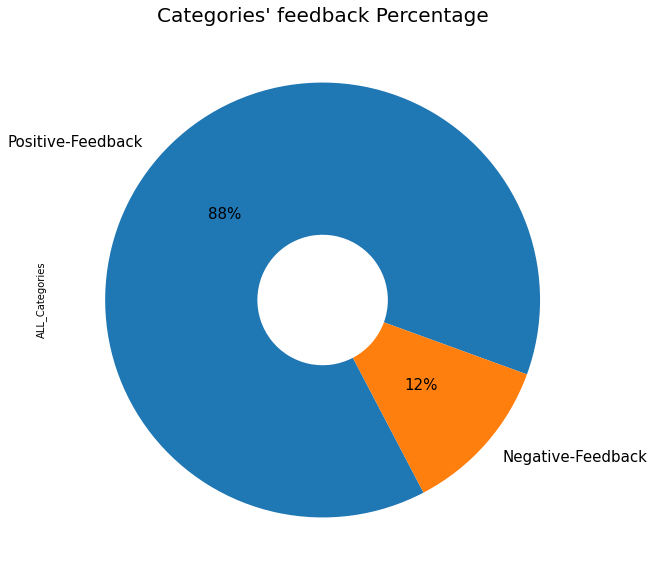

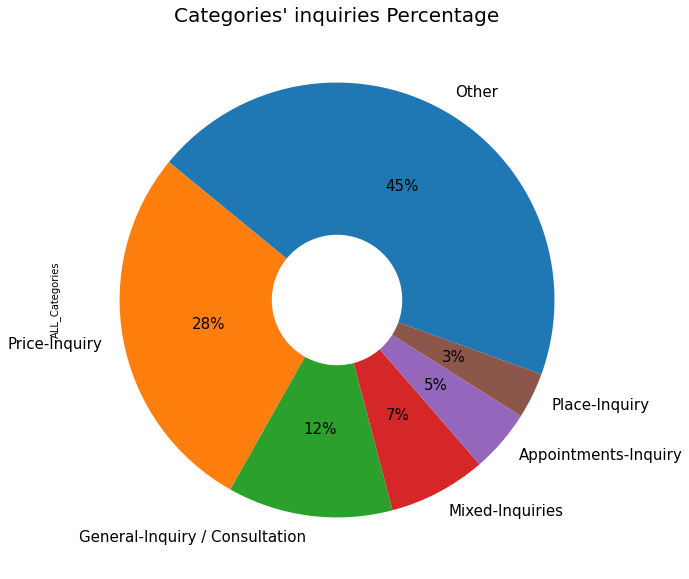

In [ ]:
os.chdir("../Evaluation/")
# ! python Evcaluate.py
from Evaluation_function import Evaluate
import pandas as pd

df = pd.read_csv("./data/data.csv")

eval = Evaluate(df)
transformed = eval.transform(vectorizer="w2v")
predictiones = eval.predict(input=transformed, model_name='FCNN_w2v_model')
eval.add_dicts()
eval.visualize()
Final_data = eval.get_data()
print(Final_data.sample(5, random_state=10))

os.chdir(curDir)
!pwd

In [ ]:
Final_data.sample(5, random_state=10)

,Unnamed: 0,Unnamed: 0.1,message,predicted,tags,inquiry,ALL_Categories
1462,1462,1664,المواعيد وسعر الكشف,obj,price-datetime-,1,Mixed-Inquiries
2783,2783,3145,فيه فرع بني سويف,obj,place-,1,Place-Inquiry
3231,3231,3669,الكشف لكام ةالحشو,obj,,0,Other
1198,1198,1340,جرين بيل,obj,,0,Other
372,372,415,بكم الجلسه,obj,price-,1,Price-Inquiry
